In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Librerías
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import pandas as pd
from argparse import ArgumentParser
from google.colab.patches import cv2_imshow
from skimage.filters import threshold_otsu
from pathlib import Path
import itertools
import time


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from collections import Counter
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,
    f1_score,balanced_accuracy_score
)
import seaborn as sns

# Transfer Lerning
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50, VGG16, VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Si faltan dependencias, descomenta:
# !pip install numpy pandas scikit-learn scipy openpyxl matplotlib seaborn tensorflow==2.15.* --quiet
# 2. Librerías



from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from scipy.stats import wilcoxon, friedmanchisquare, chi2



from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score,
    balanced_accuracy_score, confusion_matrix
)


from scipy.stats import friedmanchisquare



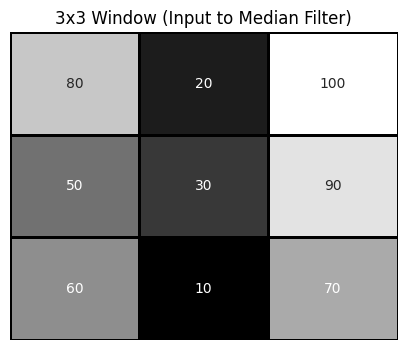

Mediana de la ventana 3x3: 60.0
Resultado del filtro (valor central): 60


In [ ]:
# Median Filter Example
ventana = np.array([
    [80, 20, 100],
    [50, 30, 90],
    [60, 10, 70]
], dtype=np.uint8)

# Filter
imagen = ventana.copy()
imagen_filtrada = cv2.medianBlur(imagen, 3)

# Original window
plt.figure(figsize=(5, 4))
sns.heatmap(ventana, annot=True, fmt="d", cbar=False, cmap='gray', linewidths=1, linecolor='black')
plt.title("3x3 Window (Input to Median Filter)")
plt.savefig("3x3 Window (Input to Median Filter)", dpi=600)
plt.axis('off')
plt.show()

# Result
print("Mediana de la ventana 3x3:", np.median(ventana))
print("Resultado del filtro (valor central):", imagen_filtrada[1, 1])


In [ ]:
# Path for Google Drive
base_path = '/content/drive/MyDrive/.../archive/'
wave = 'wave/'
spiral = 'spiral/'
training = 'training/'
testing = 'testing/'
parkinson = 'parkinson/'
healthy = 'healthy/'

image_folder = os.path.join(base_path, wave, training,parkinson)


images = os.listdir(image_folder)
print(images)

['V09PO02.png', 'V08PO03.png', 'V10PO02.png', 'V04PO02.png', 'V03PO06.png', 'V03PO02.png', 'V03PO05.png', 'V05PO02.png', 'V15PO03.png', 'V04PO03.png', 'V13PO03.png', 'V11PO03.png', 'V15PO02.png', 'V12PO02.png', 'V08PO02.png', 'V12PO01.png', 'V13PO02.png', 'V02PO03.png', 'V12PO03.png', 'V14PO02.png', 'V10PO03.png', 'V01PO03.png', 'V05PO03.png', 'V01PO02.png', 'V11PO02.png', 'V03PO08.png', 'V03PO03.png', 'V15PO01.png', 'V07PO02.png', 'V13PO01.png', 'V02PO02.png', 'V07PO03.png', 'V09PO03.png', 'V06PO03.png', 'V03PO09.png', 'V06PO02.png', 'processed']


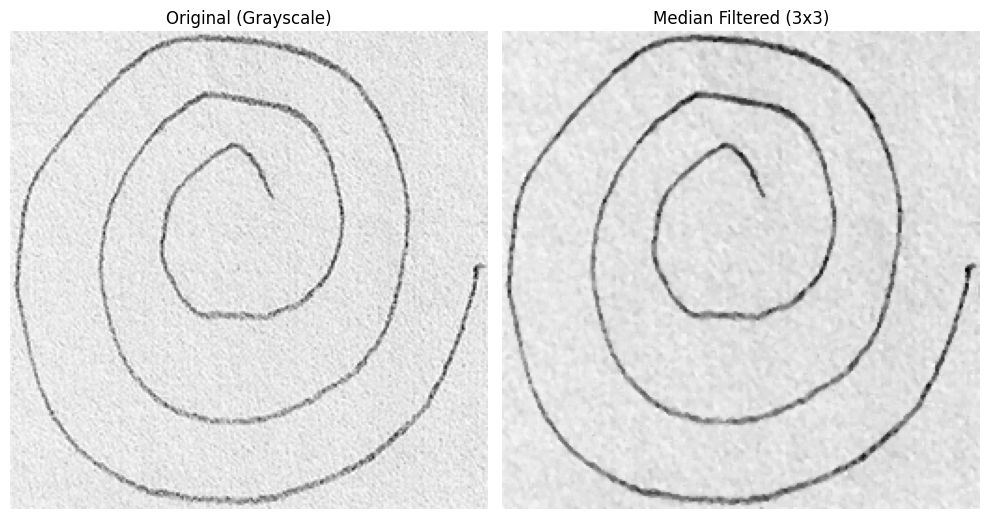

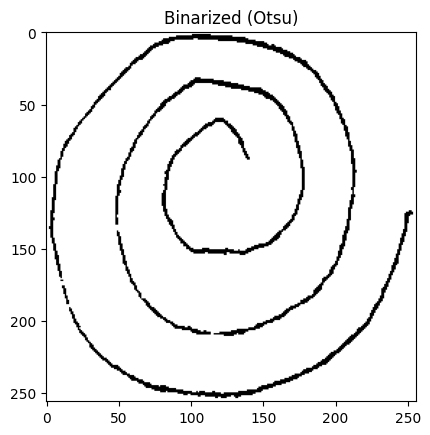

In [ ]:


#absolute path from Google Drive
ruta_carpeta = os.path.join(base_path, spiral, training, healthy)

# Valid extensions
extensiones_validas = ('.jpg', '.jpeg', '.png')

# First image
for nombre_archivo in os.listdir(ruta_carpeta):
    if nombre_archivo.lower().endswith(extensiones_validas):
        ruta_imagen = os.path.join(ruta_carpeta, nombre_archivo)
        break

# Read the image in grayscale
imagen_gris = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

# Apply median filter 3x3
imagen_filtrada = cv2.medianBlur(imagen_gris, 3)

# Binarization with Otsu
umbral = threshold_otsu(imagen_filtrada)
imagen_binarizada = imagen_filtrada > umbral

# Show the three images
fig, axs = plt.subplots(1, 2, figsize=(10, 7))

axs[0].imshow(imagen_gris, cmap='gray')
axs[0].set_title('Original (Grayscale)')
axs[0].axis('off')

axs[1].imshow(imagen_filtrada, cmap='gray')
axs[1].set_title('Median Filtered (3x3)')
axs[1].axis('off')



plt.tight_layout()
plt.show()
plt.imshow(imagen_binarizada, cmap='gray')
plt.title('Binarized (Otsu)')
plt.show()

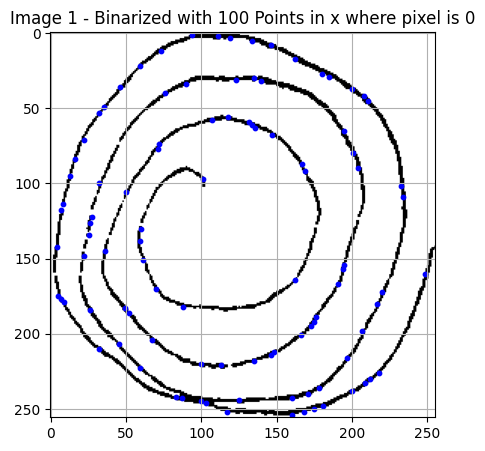

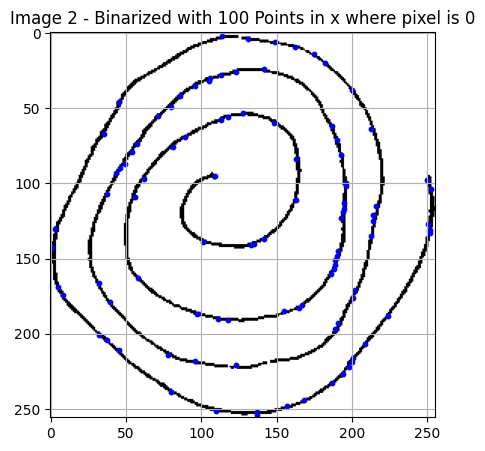

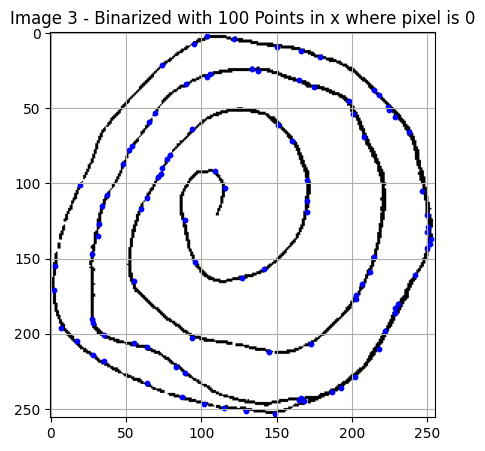

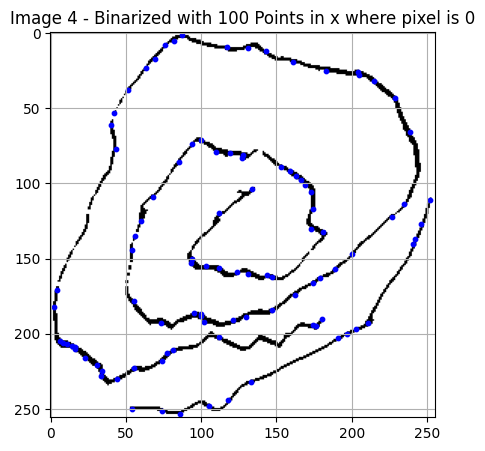

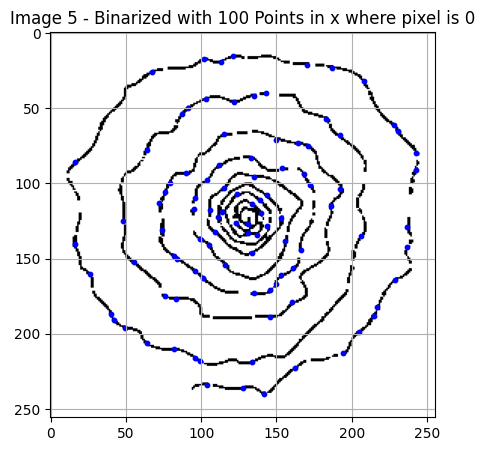

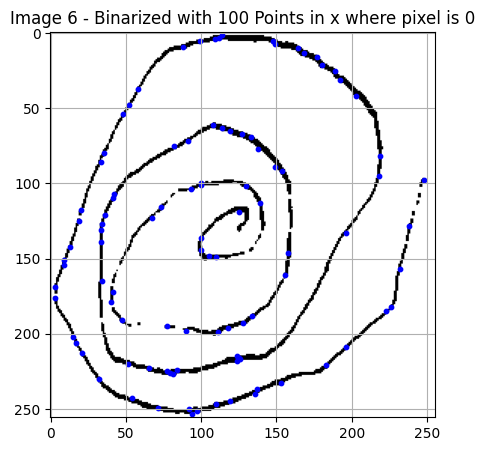

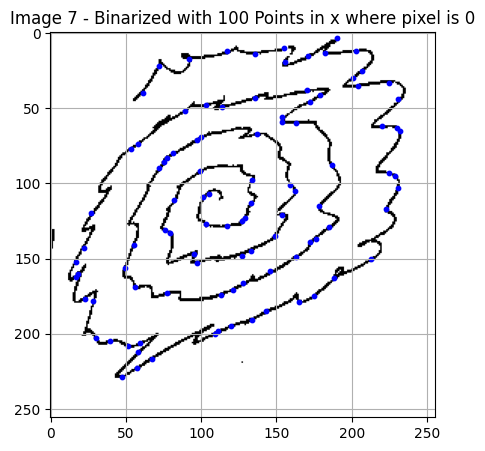

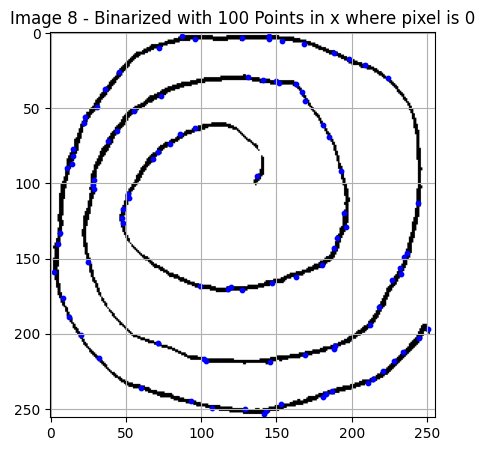

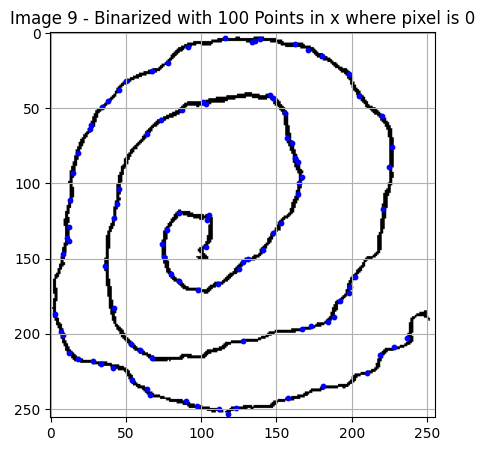

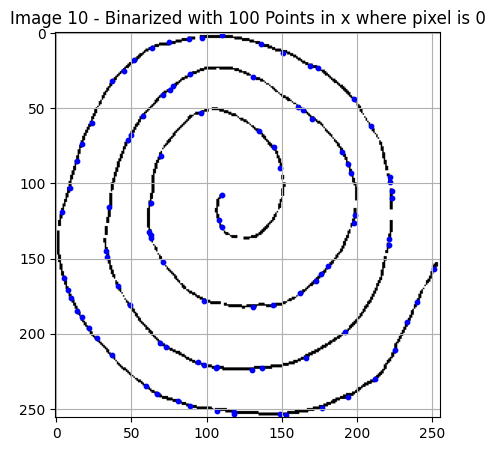

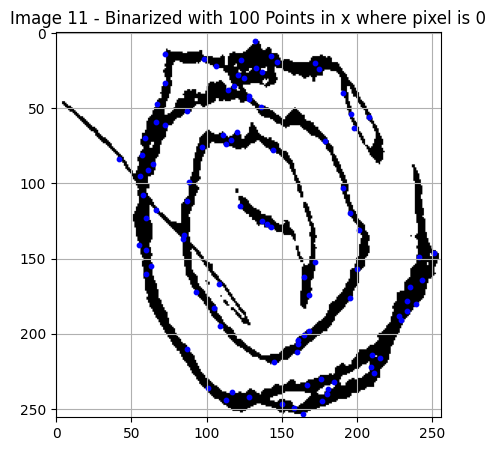

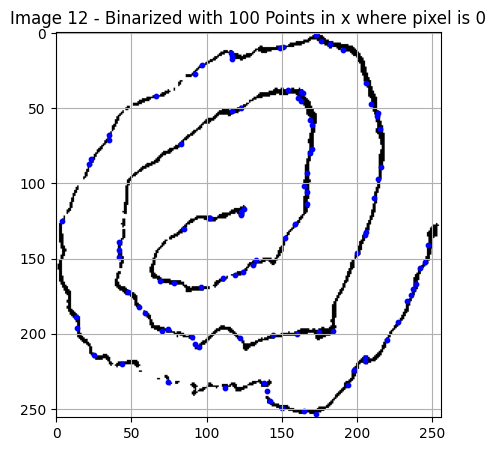

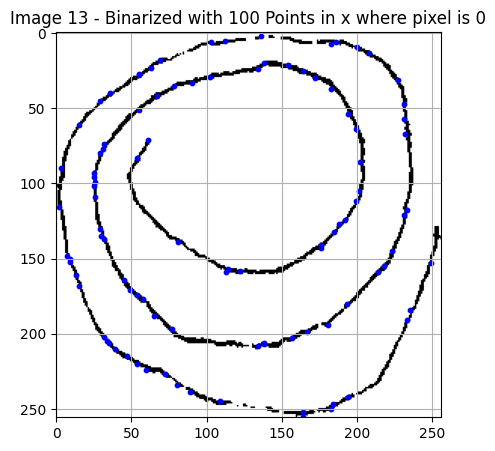

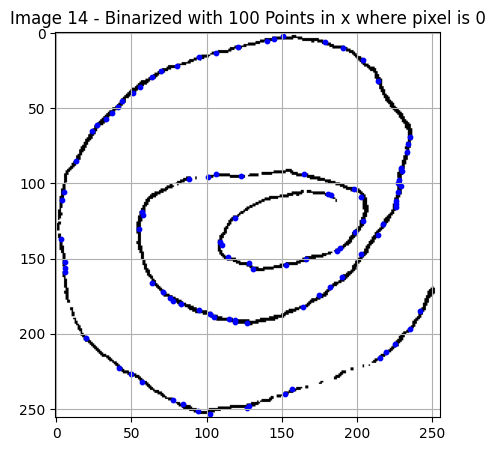

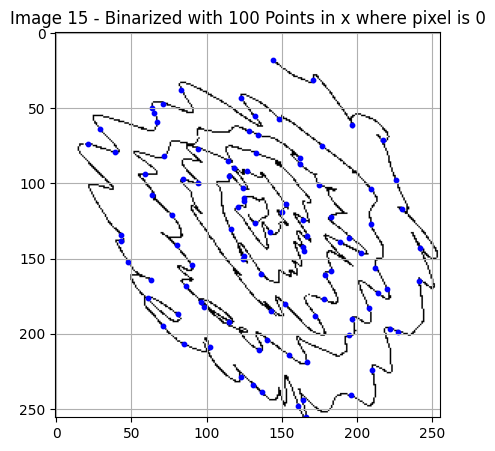

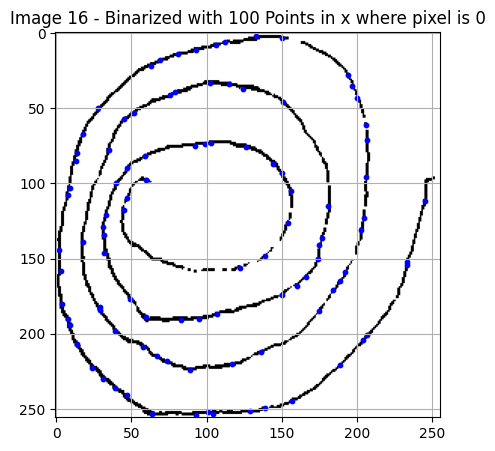

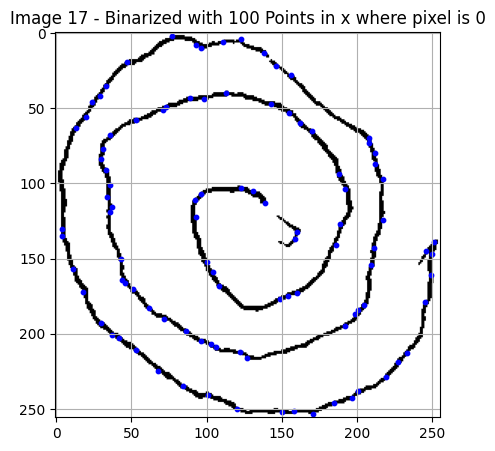

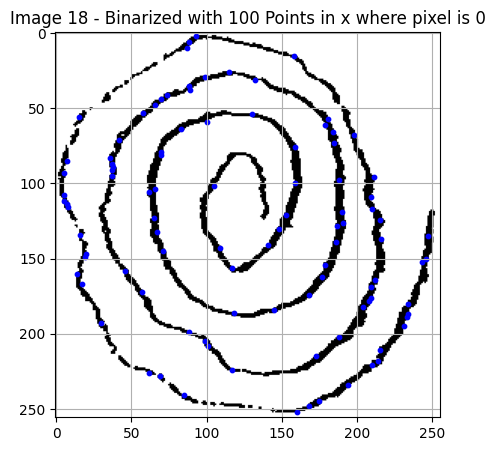

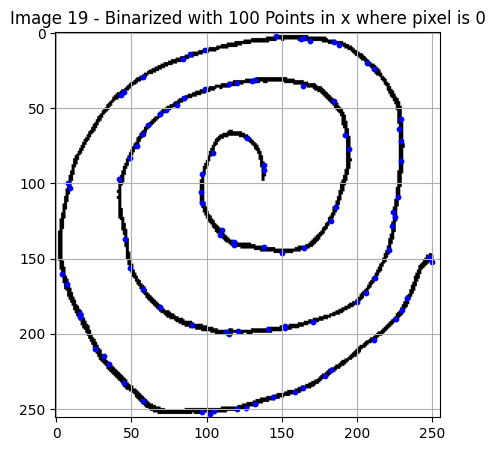

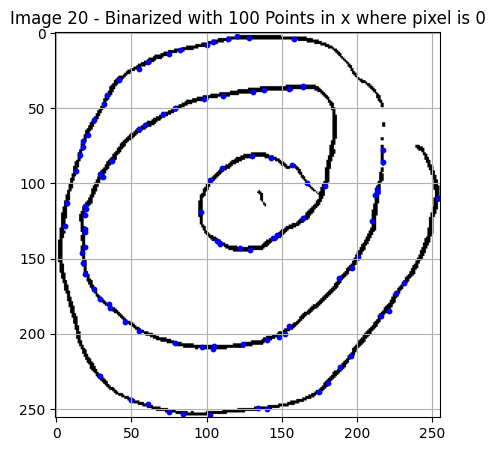

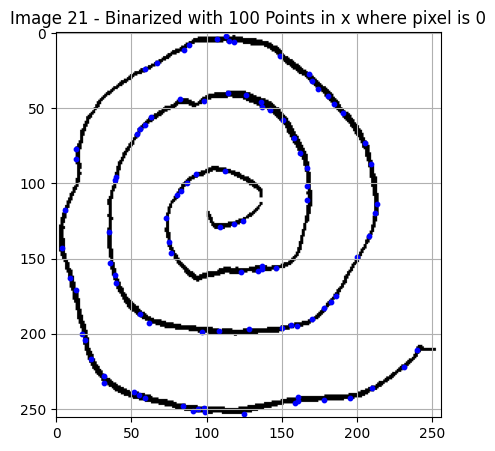

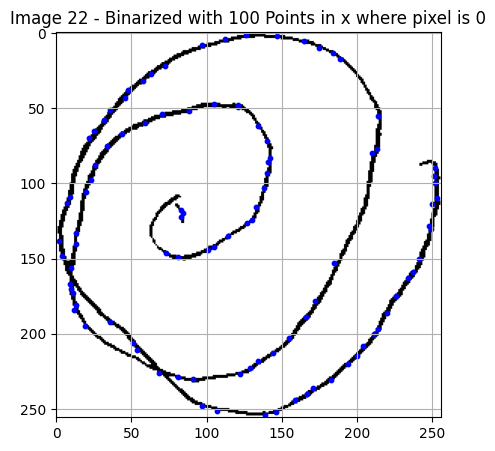

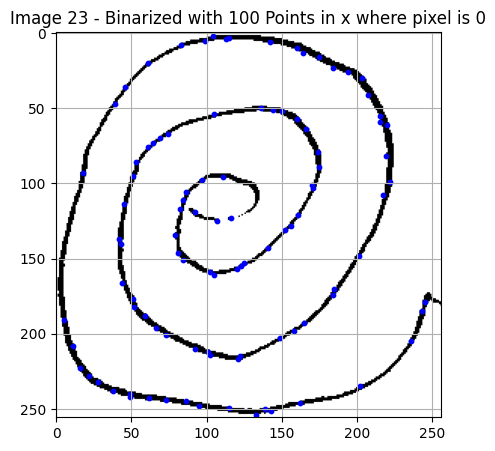

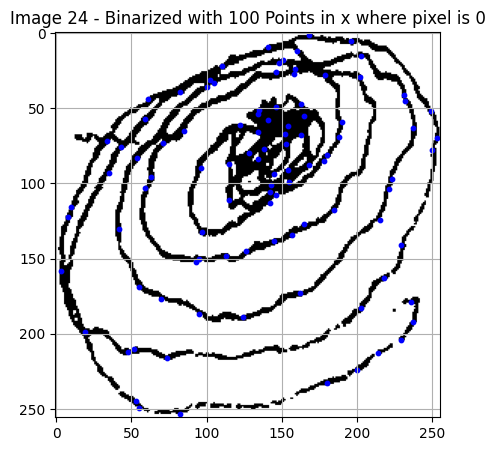

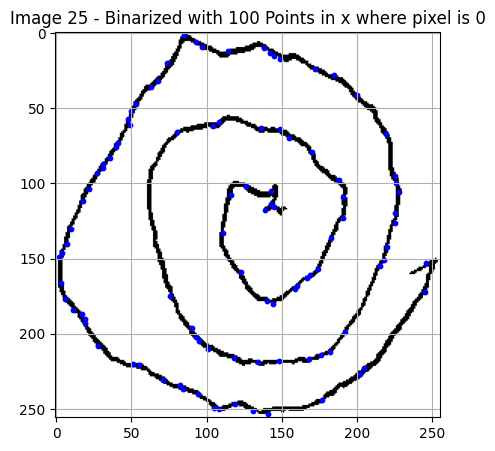

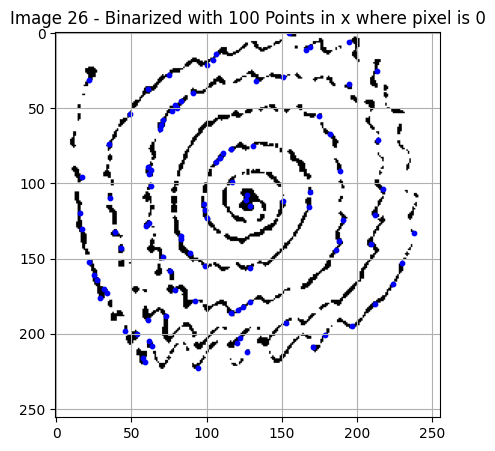

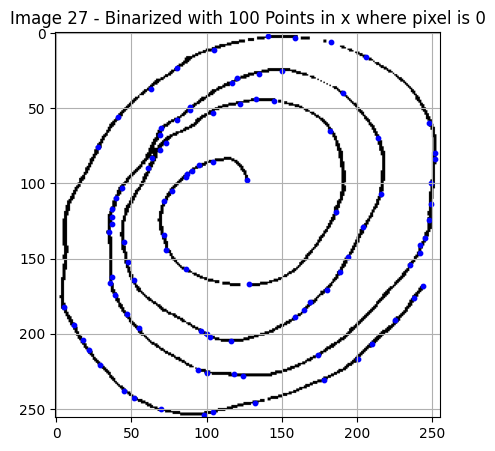

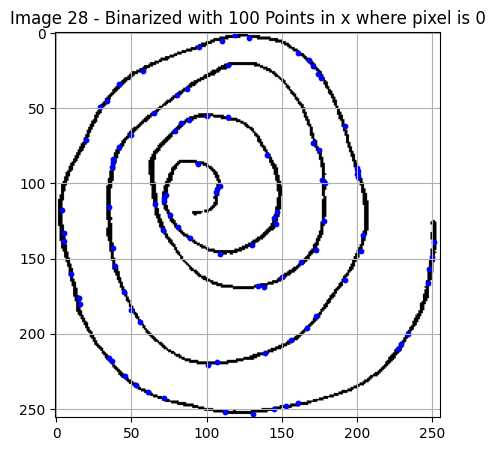

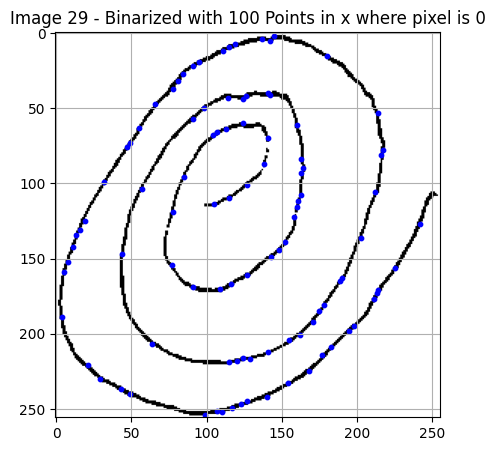

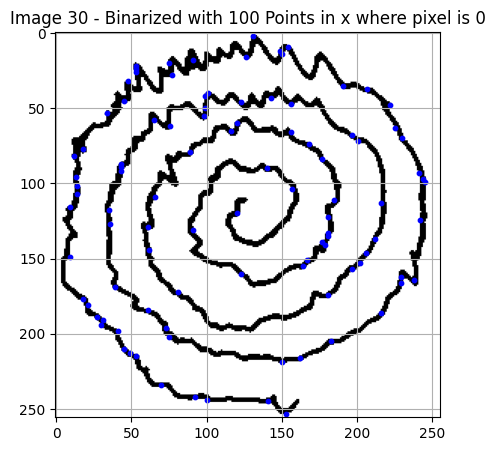

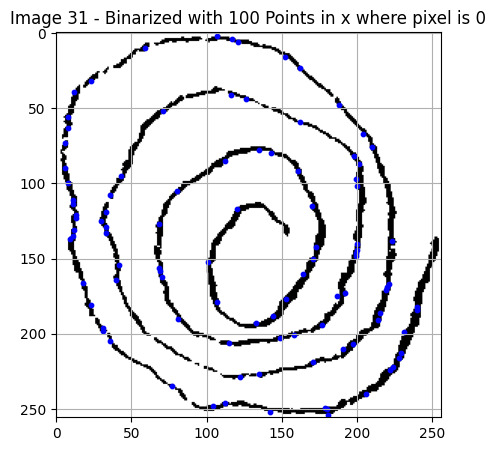

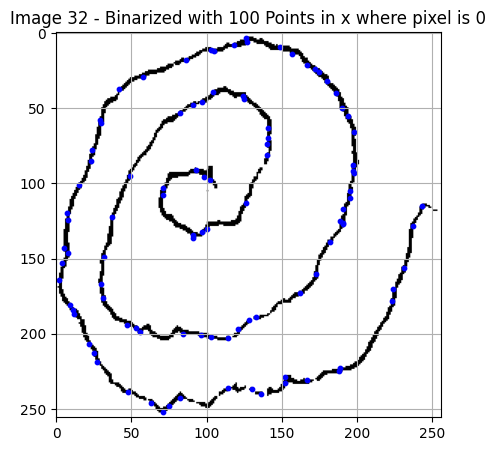

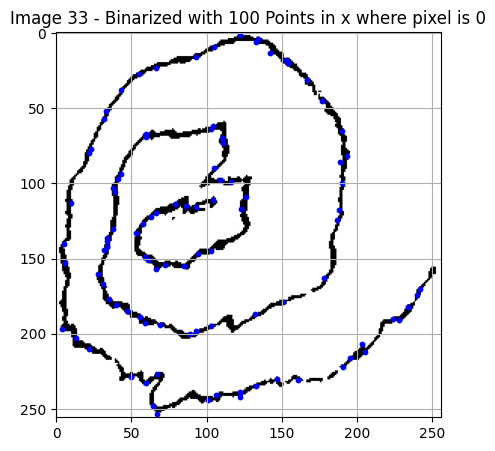

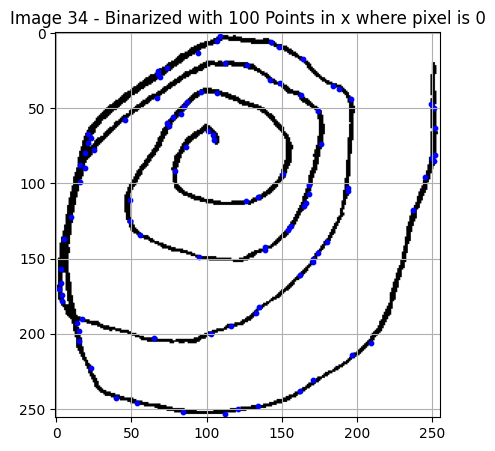

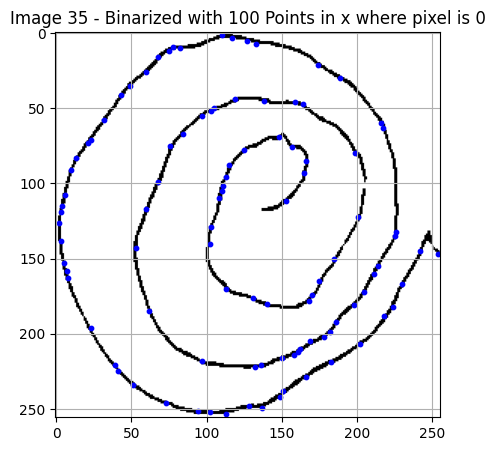

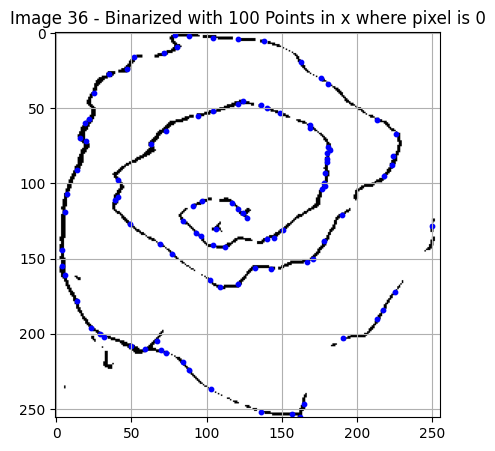

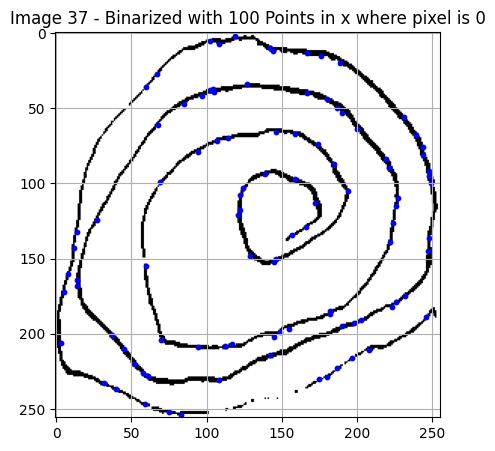

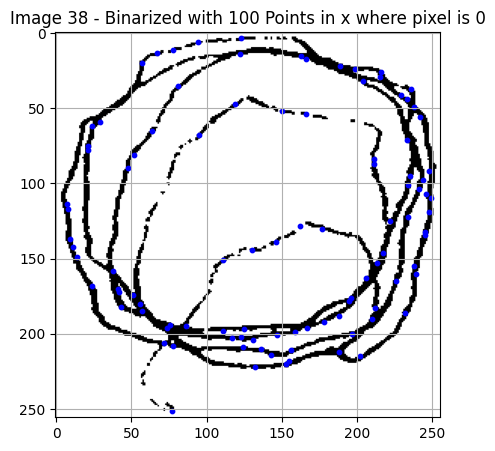

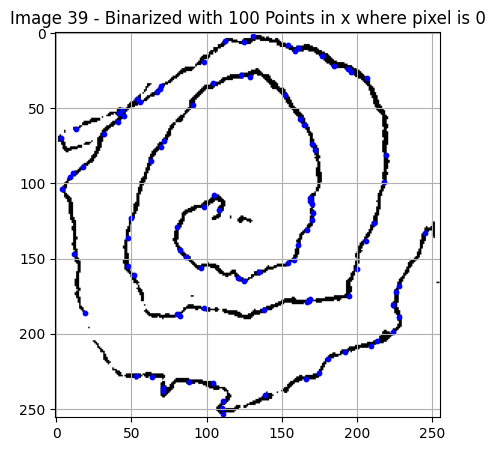

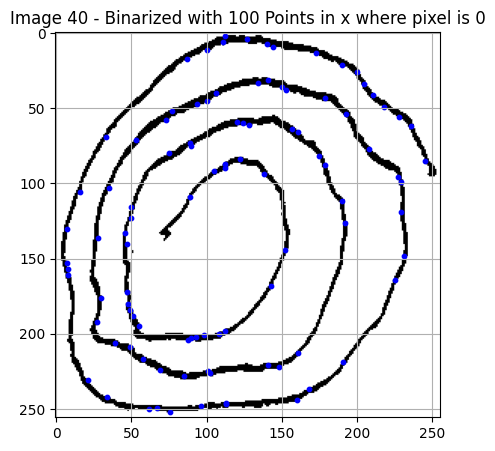

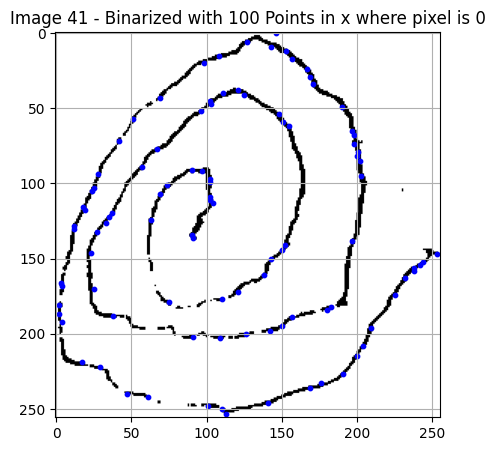

        x1     y1      x2     y2      x3     y3      x4     y4      x5     y5  \
0  -134.49 -23.68 -133.49  -6.68 -132.49   1.32 -130.49  16.32 -127.49  28.32   
1  -124.85 -22.97 -122.85  -5.97 -120.85  12.03 -117.85  25.03 -112.85  38.03   
2  -127.75 -27.50 -125.75  -9.50 -122.75 -36.50 -120.75  18.50 -117.75  34.50   
3  -138.41 -31.99 -134.41 -36.99 -131.41 -42.99 -130.41  -1.99 -129.41  12.01   
4  -108.97  -9.18 -106.97 -28.18 -104.97 -17.18 -102.97  39.82 -100.97  56.82   
5  -135.35   9.33 -133.35   7.33 -132.35   4.33 -131.35  -5.67 -131.35  43.33   
6  -107.79  65.38 -100.79  30.38  -98.79  -7.62  -98.79  78.38  -97.79  57.38   
7  -123.05 -36.57 -123.05  21.43 -122.05   3.43 -121.05 -27.57 -121.05  21.43   
8  -127.42   7.55 -126.42  30.55 -125.42  27.55 -124.42  25.55 -123.42  53.55   
9  -130.23  -3.66 -128.23 -16.66 -127.23 -25.66 -125.23 -38.66 -124.23  22.34   
10 -122.73  -7.15 -113.73 -67.15 -112.73   3.85 -110.73 -41.15 -109.73 -16.15   
11 -128.74  34.31 -124.74  3

In [ ]:
#Training Parkinson


ruta_carpeta = os.path.join(base_path, spiral, training,parkinson)


imagenes = []


for nombre_archivo in os.listdir(ruta_carpeta):
    if nombre_archivo.endswith('.jpg') or nombre_archivo.endswith('.png'):
        ruta_imagen = os.path.join(ruta_carpeta, nombre_archivo)
        imagen0 = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
        imagen = cv2.medianBlur(imagen0, 3)


        imagen_redimensionada = cv2.resize(imagen, (256, 256))
        imagenes.append(imagen_redimensionada)


def binarizar_imagen(imagen):
    thresh = threshold_otsu(imagen)
    binarizada = imagen > thresh
    return binarizada


def obtener_100_puntos_x_inversa(imagen_binarizada):

    x_coords, y_coords = np.where(imagen_binarizada == 0)


    if len(x_coords) < 100:
        print("Advertencia: La imagen no tiene suficientes píxeles binarizados en 0.")
        return x_coords, y_coords


    indices = np.linspace(0, len(x_coords) - 1, 100, dtype=int)
    puntos_x = x_coords[indices]
    puntos_y = y_coords[indices]

    return puntos_x, puntos_y


dataframes = []


for i, imagen in enumerate(imagenes):
    imagen_binarizada = binarizar_imagen(imagen)
    puntos_x, puntos_y = obtener_100_puntos_x_inversa(imagen_binarizada)


    x_mean = np.mean(puntos_x)
    y_mean = np.mean(puntos_y)
    x_norm = puntos_x - x_mean
    y_norm = puntos_y - y_mean


    hu_moments = cv2.HuMoments(cv2.moments(imagen_binarizada.astype(np.uint8))).flatten()
    hu_log = -np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-10) 


    datos = {}
    for j in range(100):
        datos[f'x{j+1}'] = x_norm[j]#puntos_x[j]#x_norm[j]
        datos[f'y{j+1}'] = y_norm[j]#puntos_y[j]#y_norm[j]


    for j in range(7):
        datos[f'Hu{j+1}'] = hu_log[j]


    df = pd.DataFrame([datos])
    dataframes.append(df)


    plt.figure(figsize=(10, 5))
    plt.imshow(imagen_binarizada, cmap='gray')
    plt.scatter(puntos_y, puntos_x, c='blue', s=10)
    plt.title(f'Image {i+1} - Binarized with 100 Points in x where pixel is 0')
    plt.grid(True)
    plt.show()

TrPa = pd.concat(dataframes, ignore_index=True)
TrPa['clase'] = 1                     


print(TrPa)


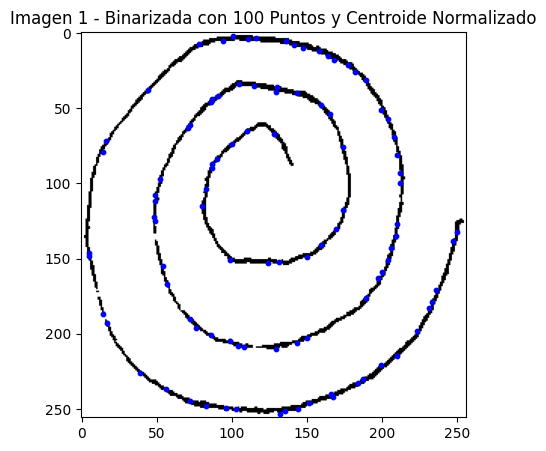

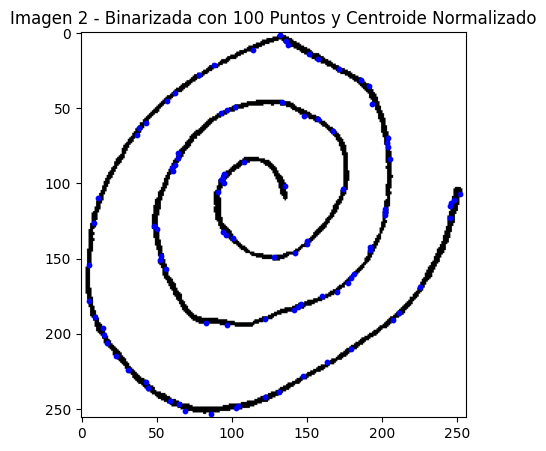

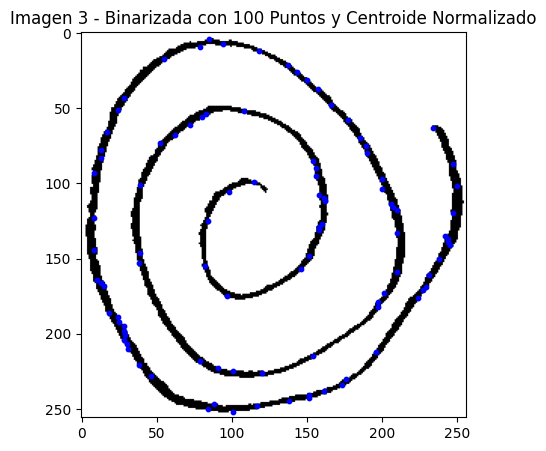

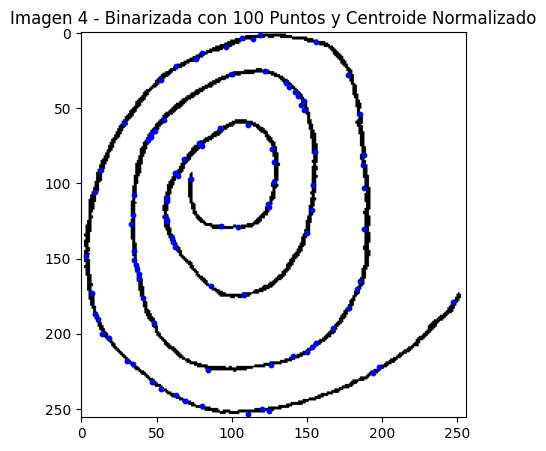

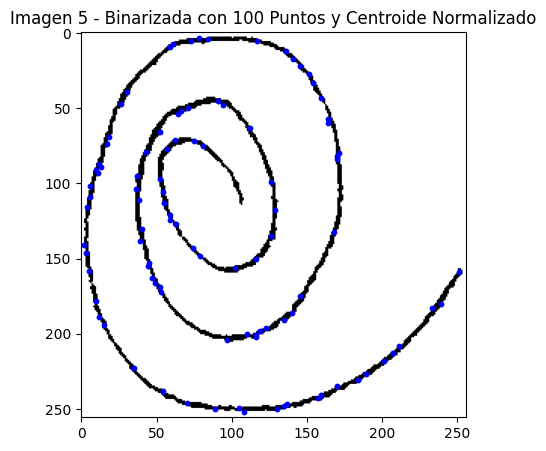

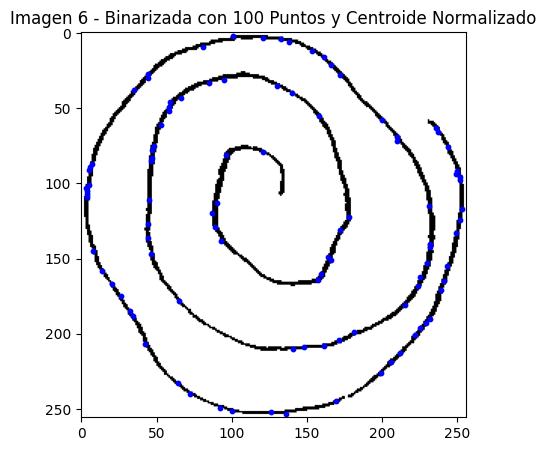

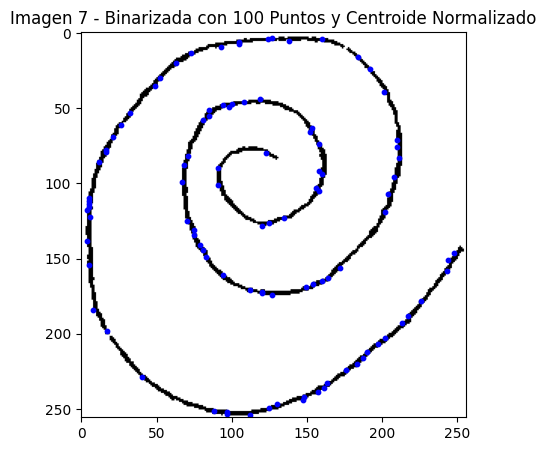

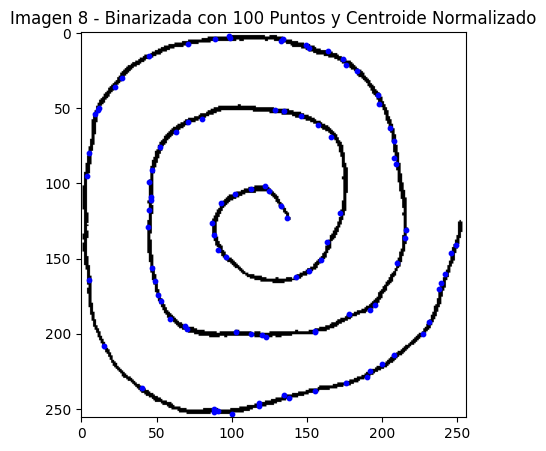

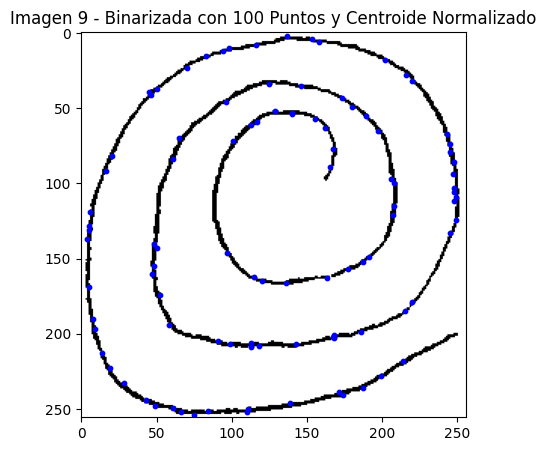

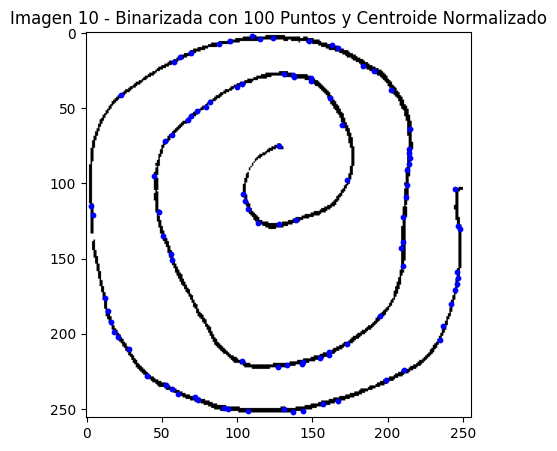

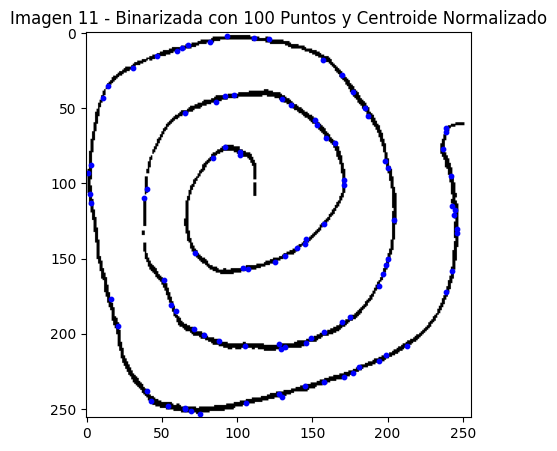

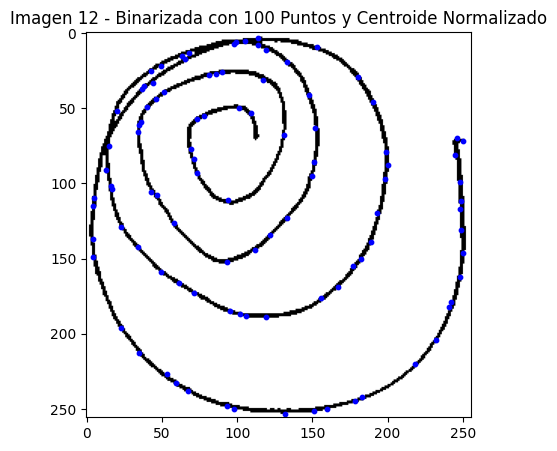

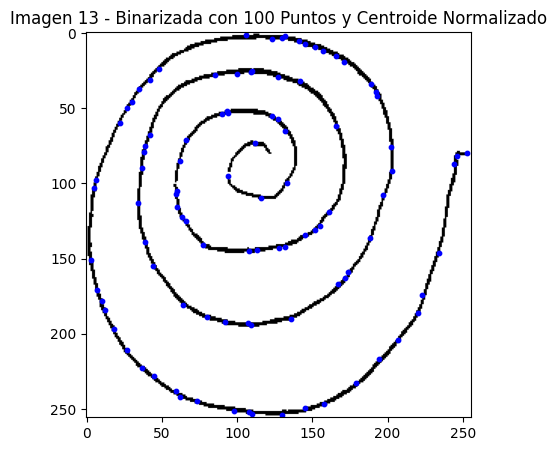

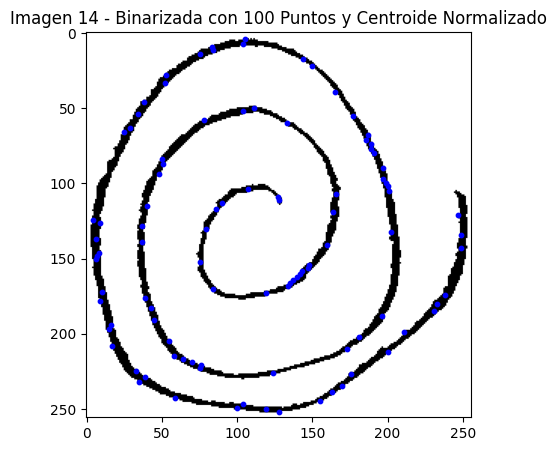

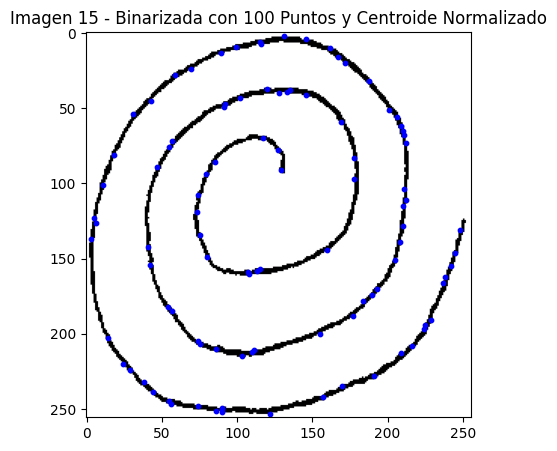

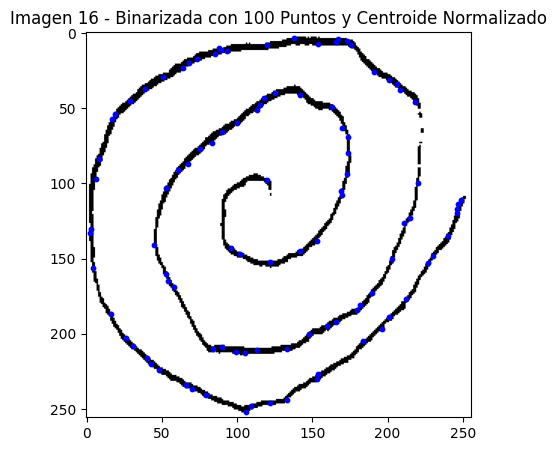

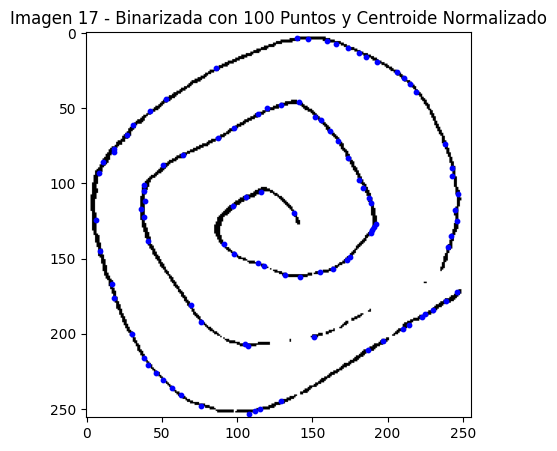

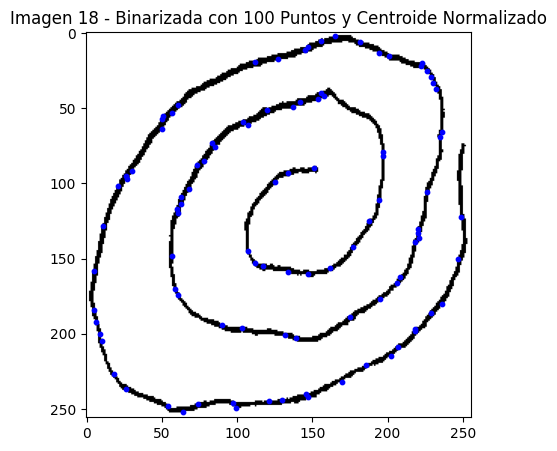

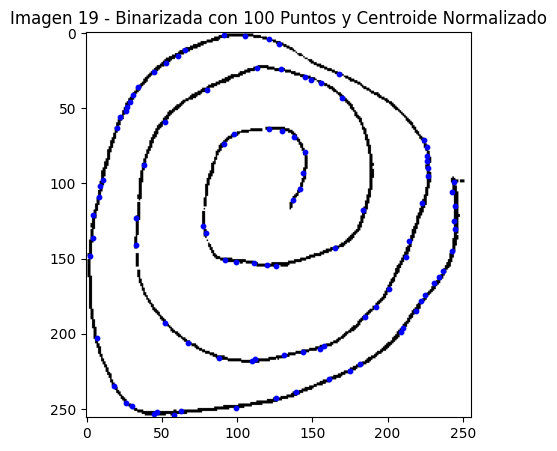

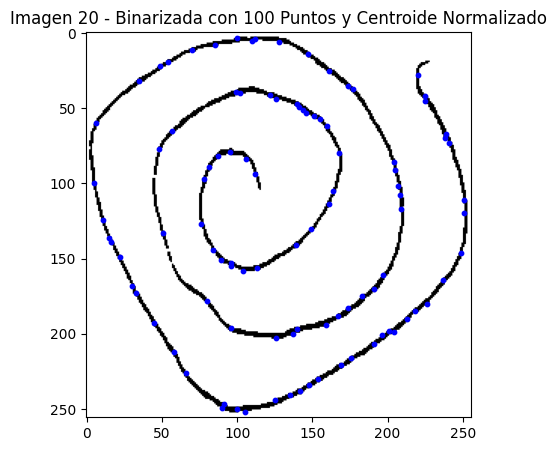

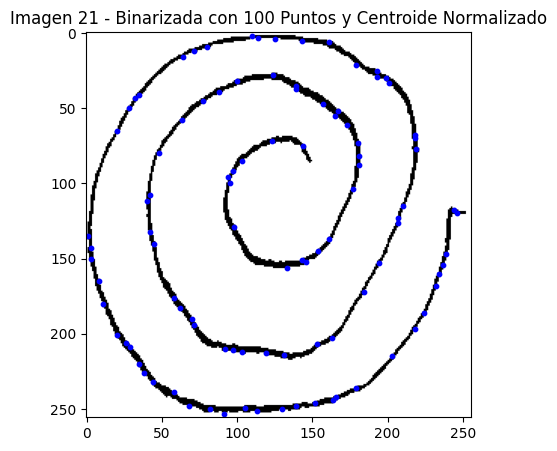

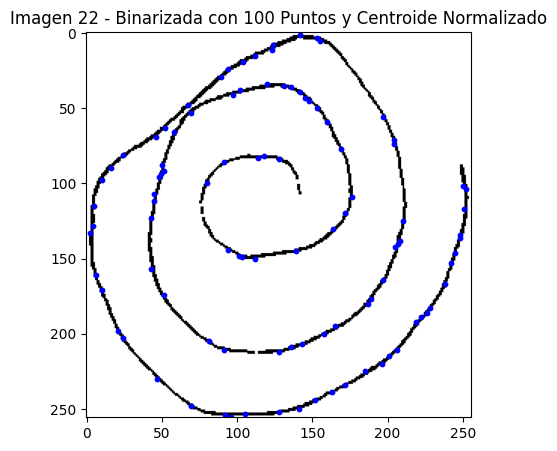

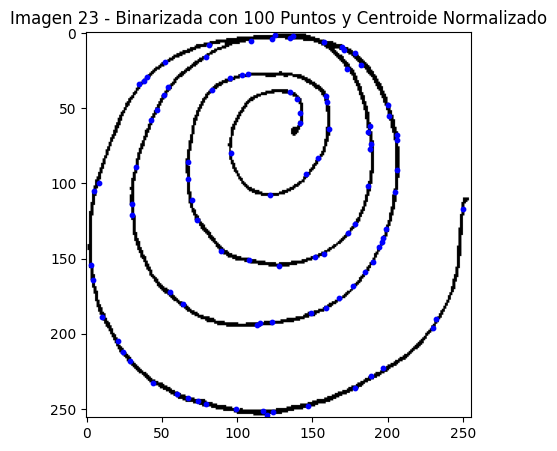

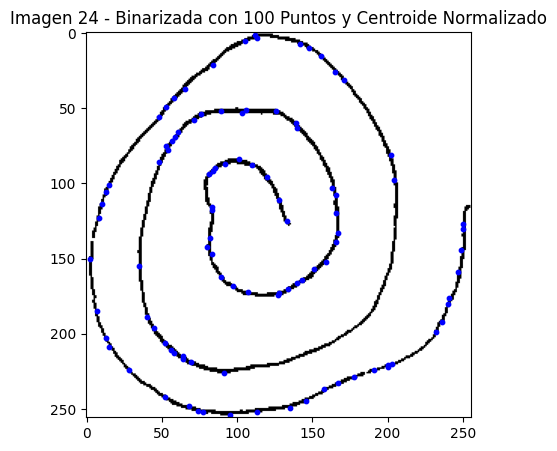

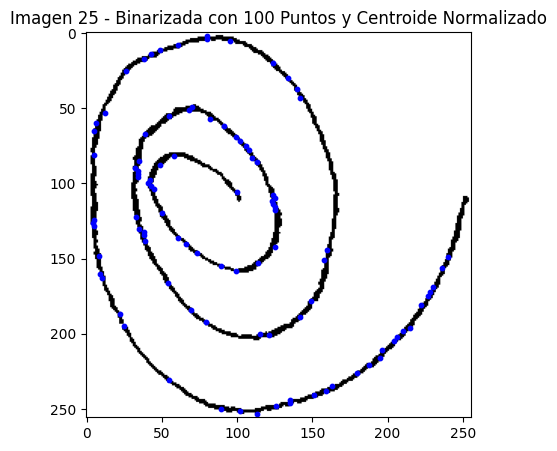

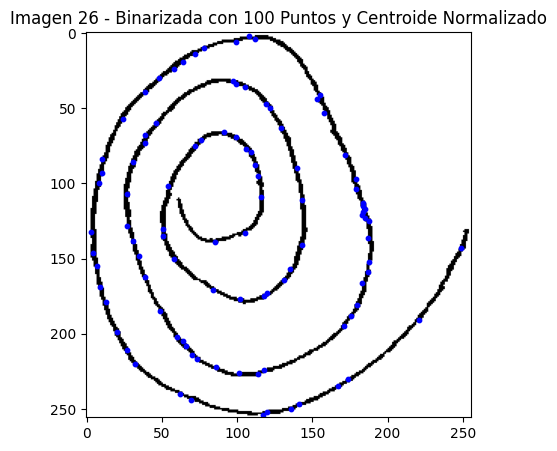

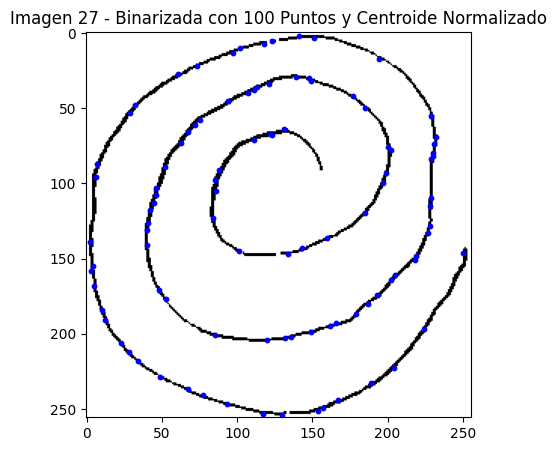

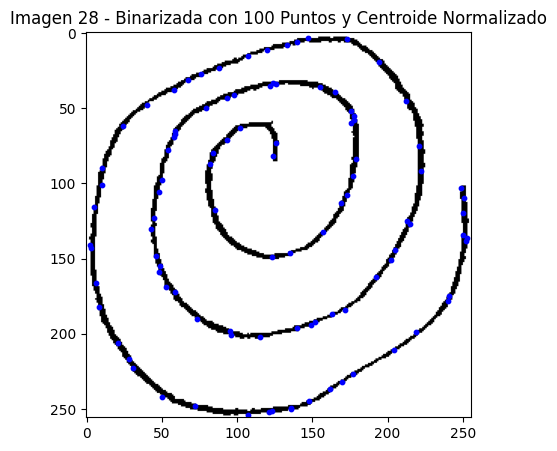

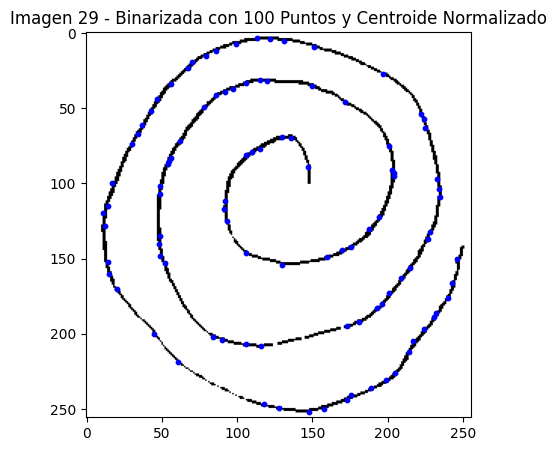

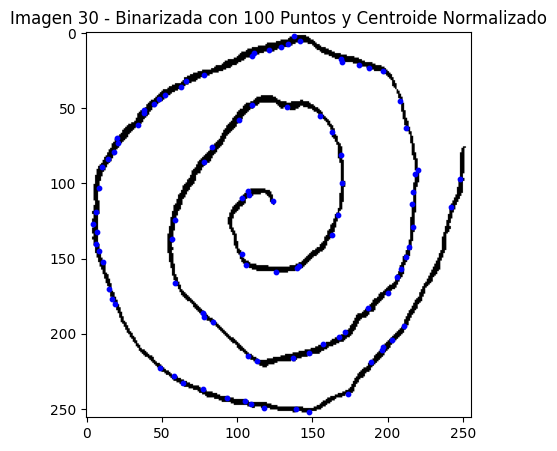

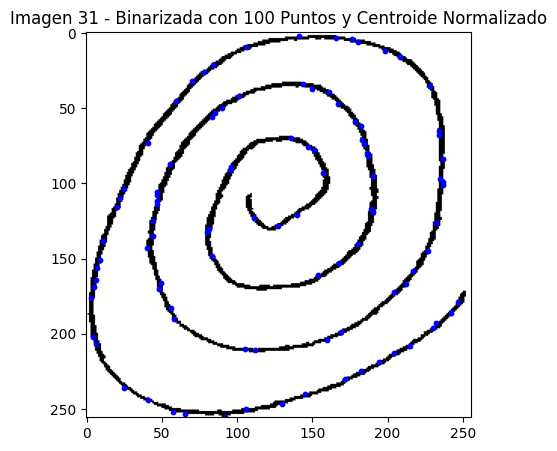

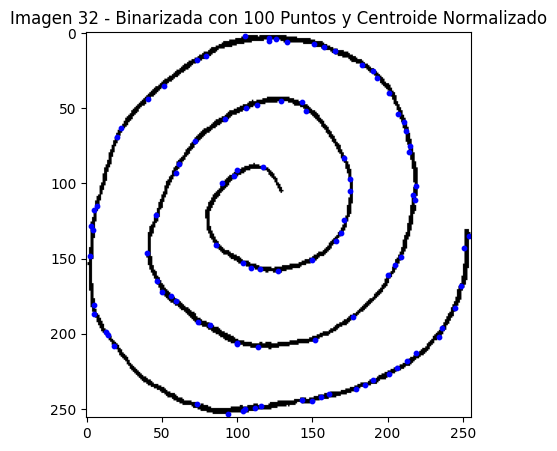

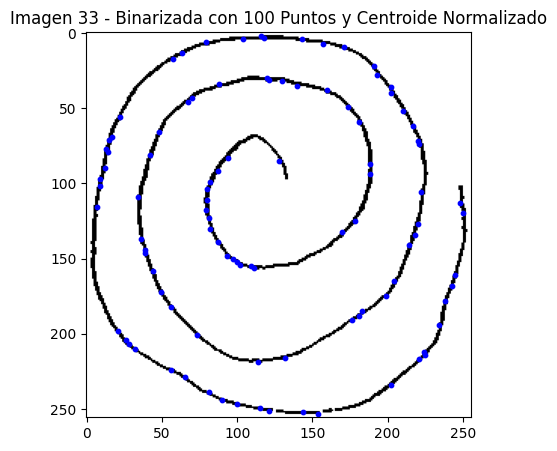

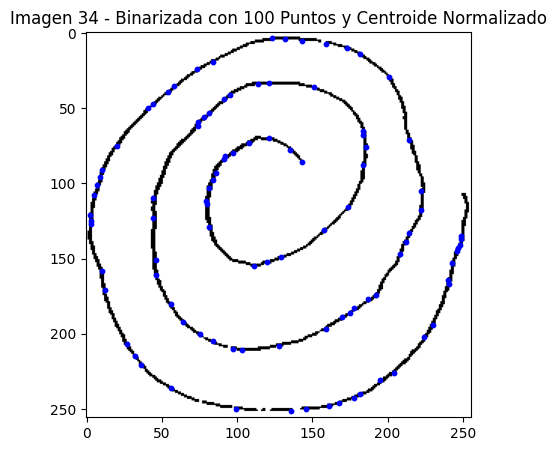

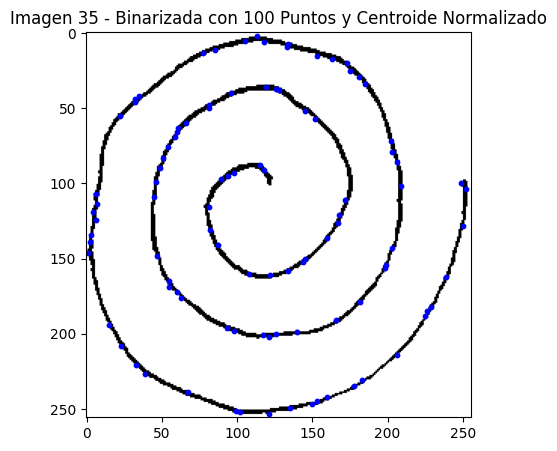

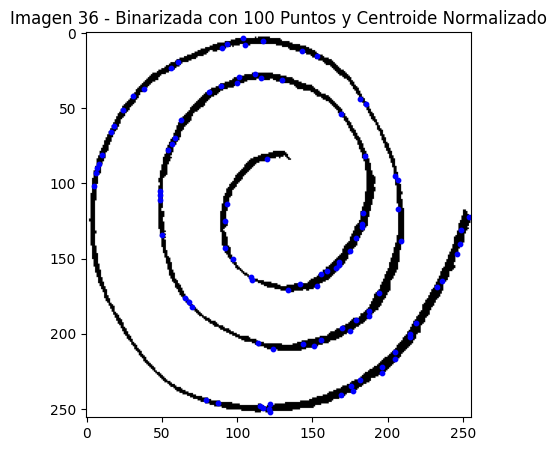

        x1     y1      x2     y2      x3     y3      x4     y4      x5     y5  \
0  -121.84 -28.04 -120.84 -13.04 -119.84 -18.04 -118.84 -35.04 -118.84   6.96   
1  -126.20  12.78 -122.20  16.78 -119.20  17.78 -116.20  -5.22 -113.20  31.78   
2  -130.94 -38.97 -127.94 -29.97 -125.94 -44.97 -122.94  -5.97 -117.94 -68.97   
3  -122.52  23.70 -120.52  11.70 -119.52  18.70 -117.52  60.70 -114.52   0.70   
4  -125.43 -13.72 -124.43  -7.72 -123.43 -18.72 -123.43  25.28 -121.43 -30.72   
5  -119.16 -28.61 -118.16  -8.61 -117.16   3.39 -115.16   8.39 -112.16 -48.61   
6  -118.91  10.20 -117.91   7.20 -117.91  43.20 -116.91  21.20 -115.91 -11.80   
7  -125.29 -25.30 -124.29 -24.30 -123.29 -34.30 -123.29  10.70 -122.29   9.70   
8  -126.72   7.35 -124.72  23.35 -122.72  28.35 -120.72 -13.65 -118.72 -31.65   
9  -125.35 -21.65 -124.35  -7.65 -123.35 -16.65 -122.35 -36.65 -122.35  16.35   
10 -128.79 -34.50 -127.79 -16.50 -126.79  -6.50 -124.79 -45.50 -122.79 -60.50   
11 -105.43   2.47 -103.43  -

In [ ]:
#Traning Healthy


ruta_carpeta = os.path.join(base_path, spiral, training,healthy)


imagenes = []


for nombre_archivo in os.listdir(ruta_carpeta):
    if nombre_archivo.endswith('.jpg') or nombre_archivo.endswith('.png'):
        ruta_imagen = os.path.join(ruta_carpeta, nombre_archivo)
        imagen0 = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
        imagen = cv2.medianBlur(imagen0, 3)

       
        imagen_redimensionada = cv2.resize(imagen, (256, 256))
        imagenes.append(imagen_redimensionada)


def binarizar_imagen(imagen):
    thresh = threshold_otsu(imagen)
    binarizada = imagen > thresh
    return binarizada

def obtener_100_puntos_x_inversa(imagen_binarizada):

    x_coords, y_coords = np.where(imagen_binarizada == 0)

    if len(x_coords) < 100:
        print("Advertencia: La imagen no tiene suficientes píxeles binarizados en 0.")
        return x_coords, y_coords

    indices = np.linspace(0, len(x_coords) - 1, 100, dtype=int)
    puntos_x = x_coords[indices]
    puntos_y = y_coords[indices]

    return puntos_x, puntos_y

dataframes = []


for i, imagen in enumerate(imagenes):
    imagen_binarizada = binarizar_imagen(imagen)
    puntos_x, puntos_y = obtener_100_puntos_x_inversa(imagen_binarizada)

    x_mean = np.mean(puntos_x)
    y_mean = np.mean(puntos_y)
    x_norm = puntos_x - x_mean
    y_norm = puntos_y - y_mean




    hu_moments = cv2.HuMoments(cv2.moments(imagen_binarizada.astype(np.uint8))).flatten()
    hu_log = -np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-10) 


    datos = {}
    for j in range(100):
        datos[f'x{j+1}'] = x_norm[j]#puntos_x[j]#x_norm[j]
        datos[f'y{j+1}'] = y_norm[j]#puntos_y[j]#y_norm[j]


    for j in range(7):
        datos[f'Hu{j+1}'] = hu_log[j]


    df = pd.DataFrame([datos])
    dataframes.append(df)


    plt.figure(figsize=(10, 5))
    plt.imshow(imagen_binarizada, cmap='gray')
    plt.scatter(puntos_y, puntos_x, c='blue', s=10)
    plt.title(f'Imagen {i+1} - Binarizada con 100 Puntos y Centroide Normalizado')
    plt.show()


TrHe = pd.concat(dataframes, ignore_index=True)
TrHe['clase'] = 0                             


print(TrHe)

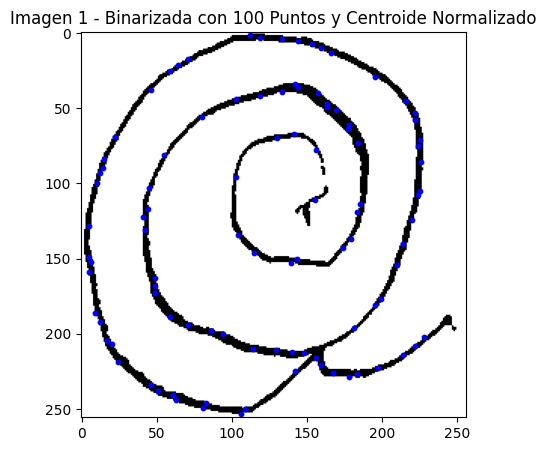

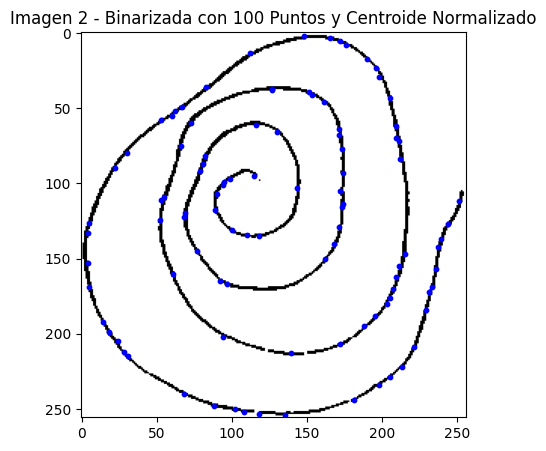

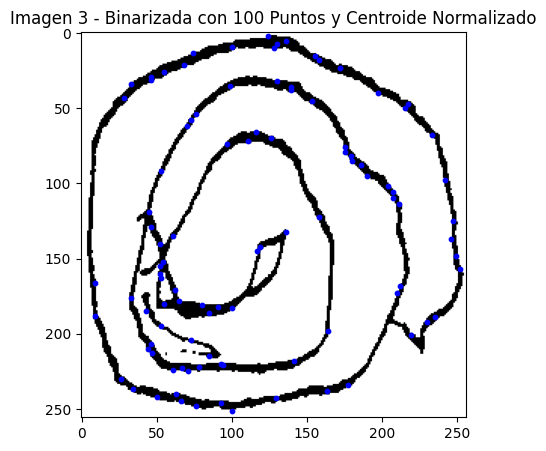

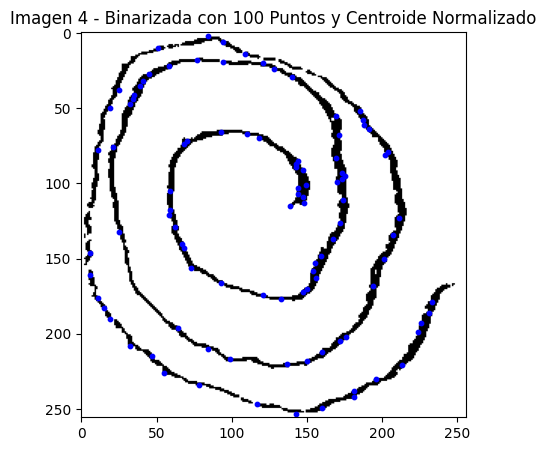

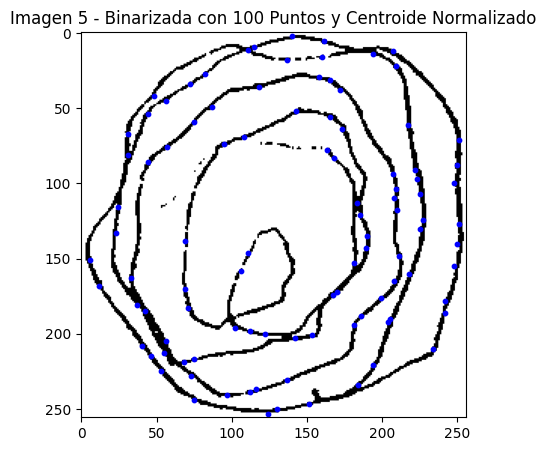

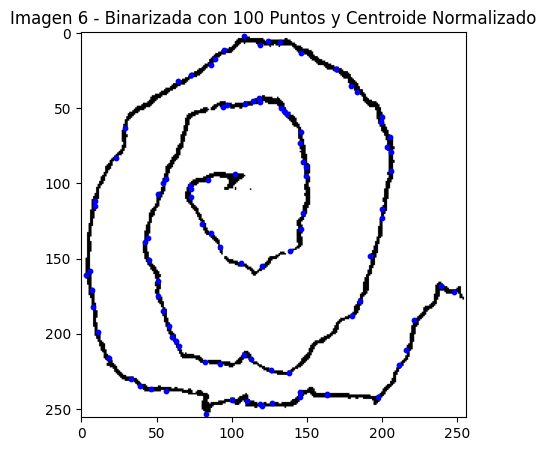

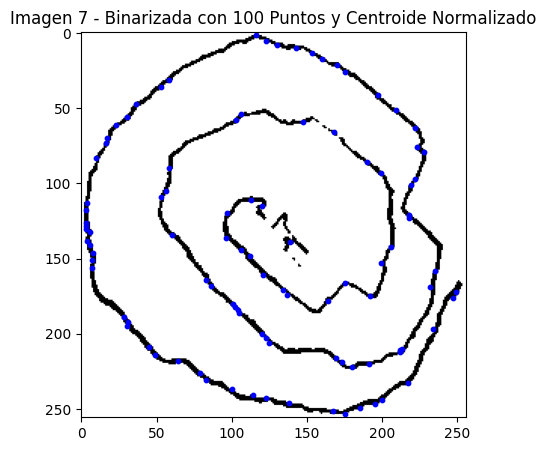

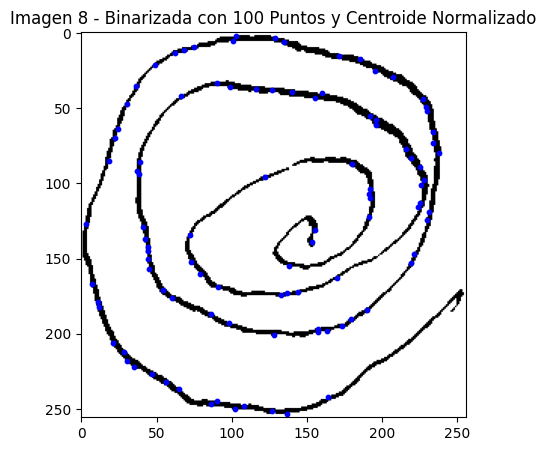

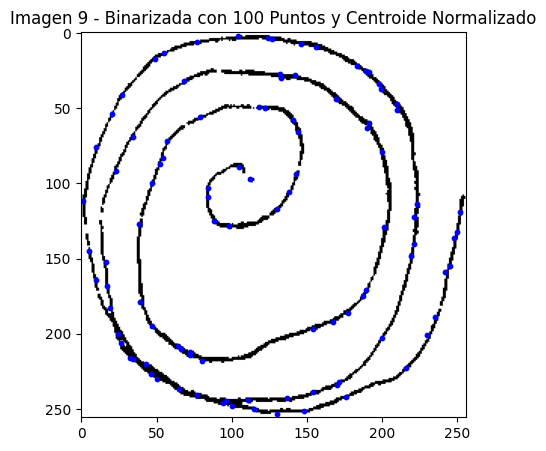

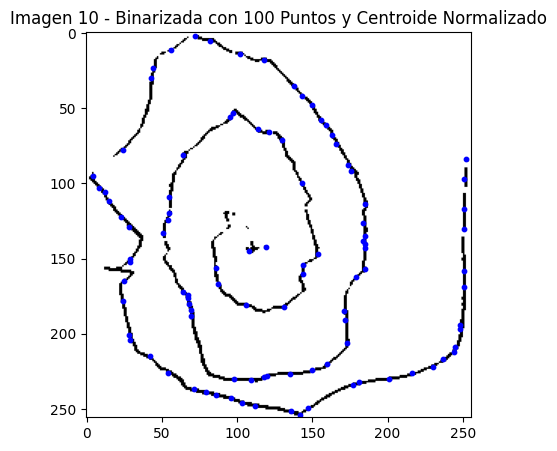

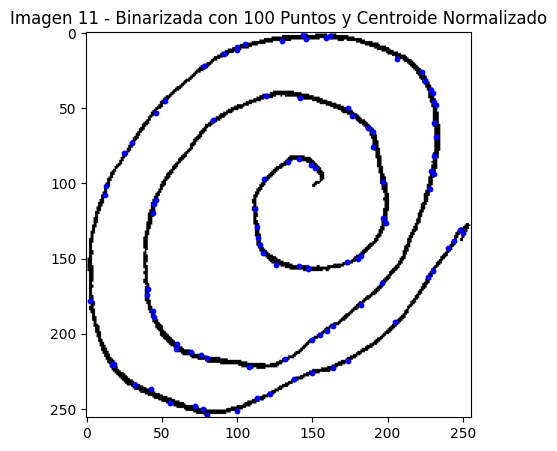

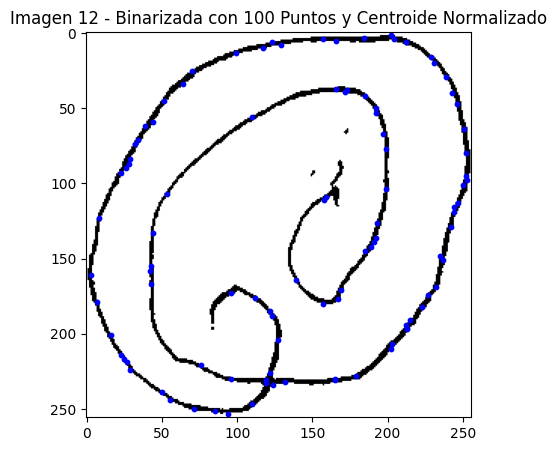

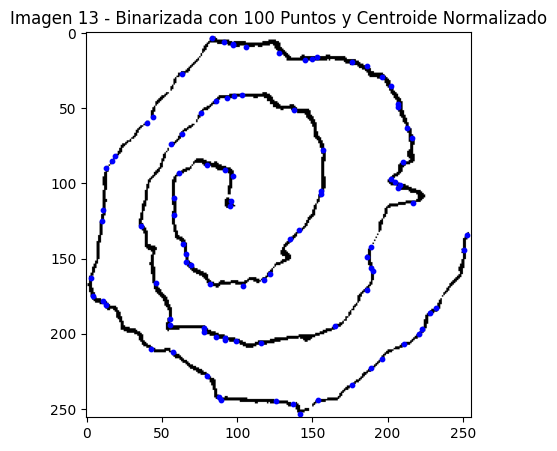

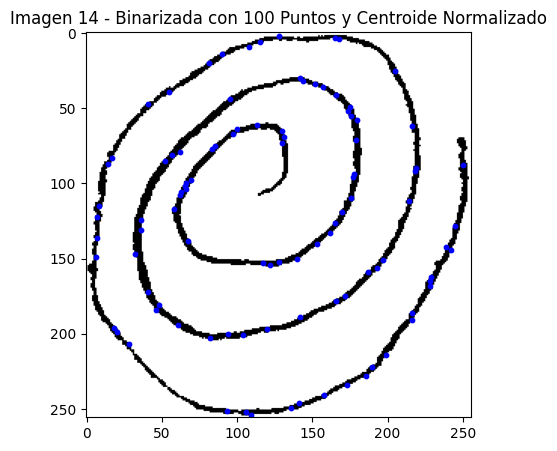

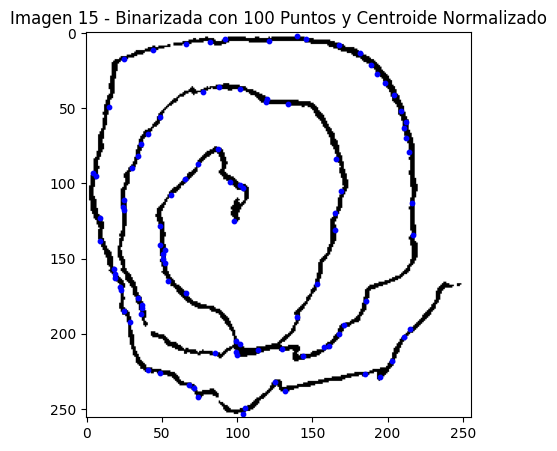

        x1     y1      x2     y2      x3     y3      x4     y4      x5     y5  \
0  -126.64  -8.80 -124.64  -1.80 -123.64  12.20 -122.64  23.20 -120.64  32.20   
1  -122.08  15.80 -121.08  32.80 -119.08  39.80 -116.08  43.80 -111.08 -20.20   
2  -128.69   7.76 -125.69  19.76 -123.69  13.76 -121.69 -16.24 -120.69  11.76   
3  -120.96 -36.03 -116.96 -26.03 -112.96 -69.03 -108.96 -11.03 -104.96 -43.03   
4  -128.71   0.25 -125.71  21.25 -121.71 -24.75 -119.71 -28.75 -118.71  67.25   
5  -131.16  -3.12 -128.16  12.88 -127.16  20.88 -125.16   7.88 -122.16 -16.12   
6  -139.49  -5.93 -135.49   1.07 -132.49   8.07 -130.49  21.07 -127.49  31.07   
7  -118.39 -20.64 -117.39   5.36 -115.39 -22.64 -114.39  11.36 -111.39 -48.64   
8  -128.86 -15.75 -127.86   4.25 -126.86   7.25 -124.86 -42.75 -123.86  26.25   
9  -146.12 -51.62 -143.12 -41.62 -137.12 -67.62 -134.12 -21.62 -130.12  -5.62   
10 -126.56   9.36 -125.56  27.36 -124.56  24.36 -123.56  11.36 -122.56  -4.64   
11 -127.01  61.56 -125.01  4

In [ ]:
#Test parkinson


ruta_carpeta = os.path.join(base_path, spiral, testing,parkinson)


imagenes = []


for nombre_archivo in os.listdir(ruta_carpeta):
    if nombre_archivo.endswith('.jpg') or nombre_archivo.endswith('.png'):
        ruta_imagen = os.path.join(ruta_carpeta, nombre_archivo)
        imagen0 = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
        imagen = cv2.medianBlur(imagen0, 3)

        
        imagen_redimensionada = cv2.resize(imagen, (256, 256))
        imagenes.append(imagen_redimensionada)


def binarizar_imagen(imagen):
    thresh = threshold_otsu(imagen)
    binarizada = imagen > thresh
    return binarizada

def obtener_100_puntos_x_inversa(imagen_binarizada):
   
    x_coords, y_coords = np.where(imagen_binarizada == 0)


    if len(x_coords) < 100:
        print("Advertencia: La imagen no tiene suficientes píxeles binarizados en 0.")
        return x_coords, y_coords


    indices = np.linspace(0, len(x_coords) - 1, 100, dtype=int)
    puntos_x = x_coords[indices]
    puntos_y = y_coords[indices]

    return puntos_x, puntos_y


dataframes = []


for i, imagen in enumerate(imagenes):
    imagen_binarizada = binarizar_imagen(imagen)
    puntos_x, puntos_y = obtener_100_puntos_x_inversa(imagen_binarizada)

    # === Normalization ===
    x_mean = np.mean(puntos_x)
    y_mean = np.mean(puntos_y)
    x_norm = puntos_x - x_mean
    y_norm = puntos_y - y_mean




    hu_moments = cv2.HuMoments(cv2.moments(imagen_binarizada.astype(np.uint8))).flatten()
    hu_log = -np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-10)  # Escala logarítmica para estabilidad


    datos = {}
    for j in range(100):
        datos[f'x{j+1}'] = x_norm[j]#puntos_x[j]#x_norm[j]
        datos[f'y{j+1}'] = y_norm[j]#puntos_y[j]#y_norm[j]


    for j in range(7):
        datos[f'Hu{j+1}'] = hu_log[j]


    df = pd.DataFrame([datos])
    dataframes.append(df)


    plt.figure(figsize=(10, 5))
    plt.imshow(imagen_binarizada, cmap='gray')
    plt.scatter(puntos_y, puntos_x, c='blue', s=10)
    plt.title(f'Imagen {i+1} - Binarizada con 100 Puntos y Centroide Normalizado')
    plt.show()


TePa = pd.concat(dataframes, ignore_index=True)
TePa['clase'] = 1

print(TePa)

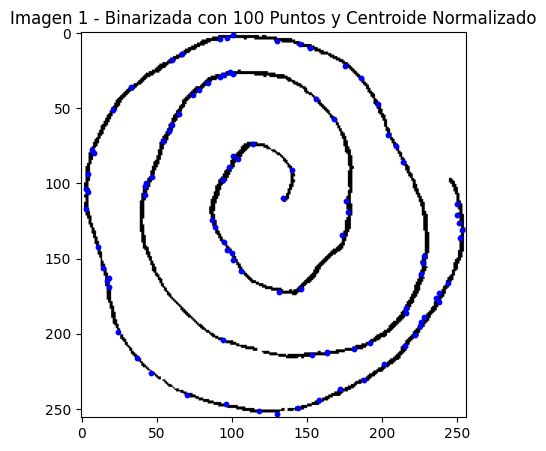

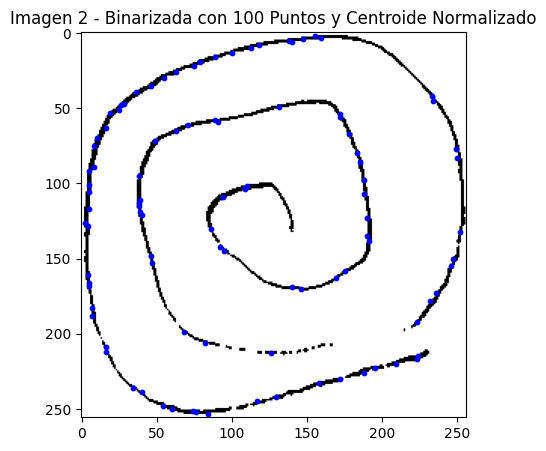

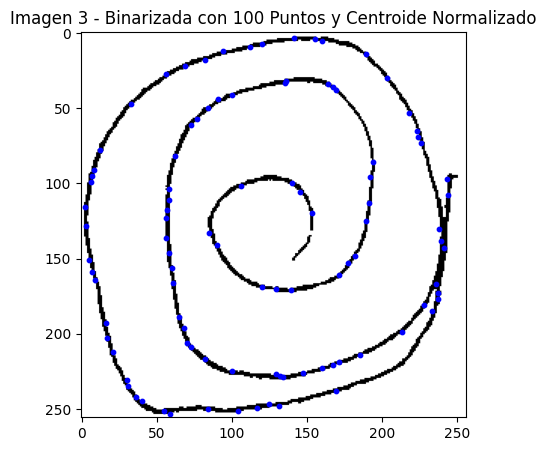

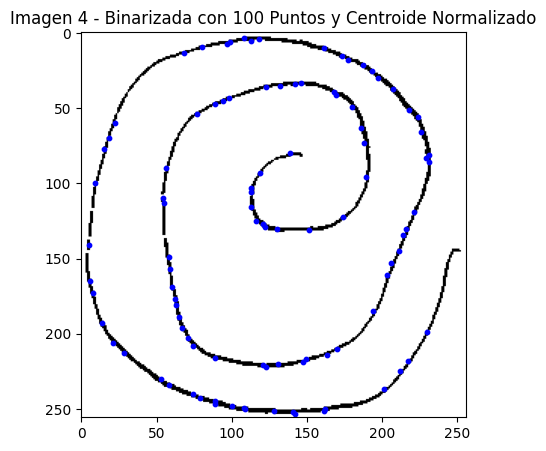

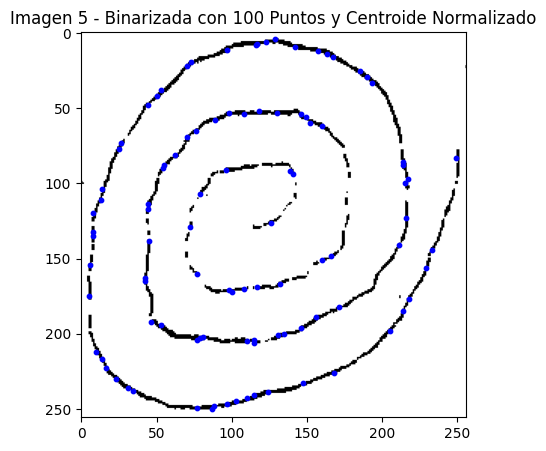

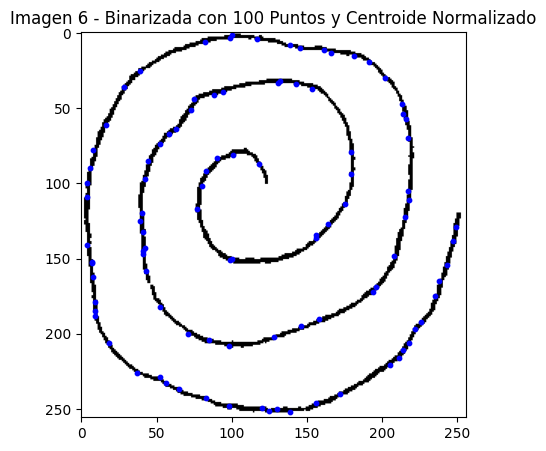

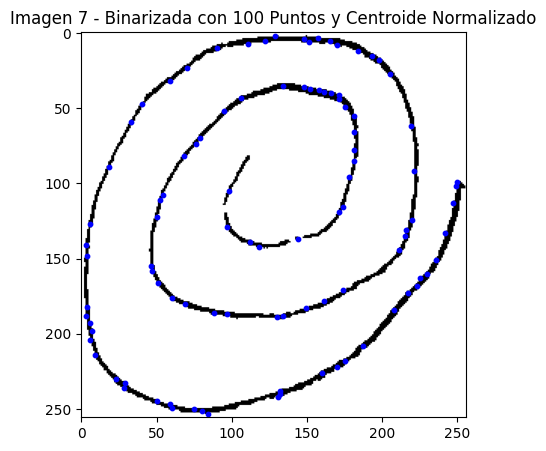

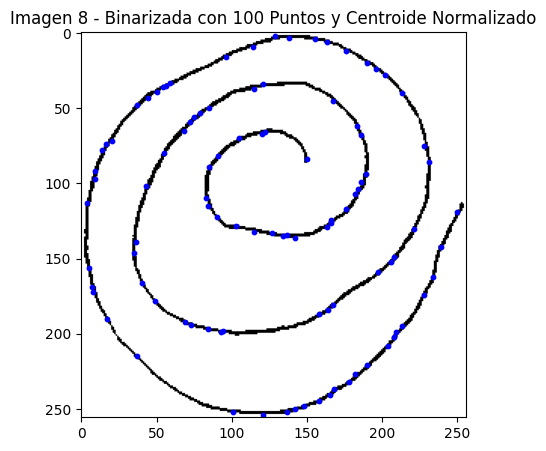

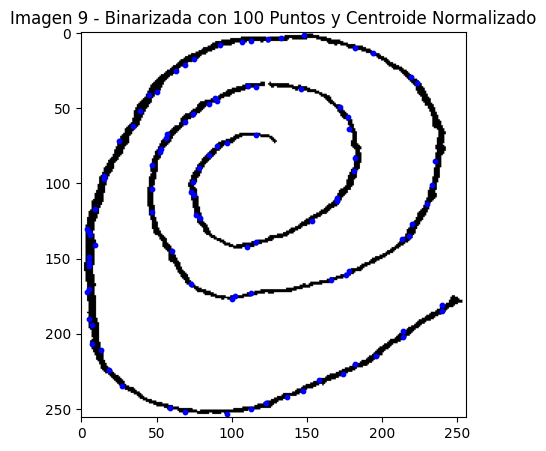

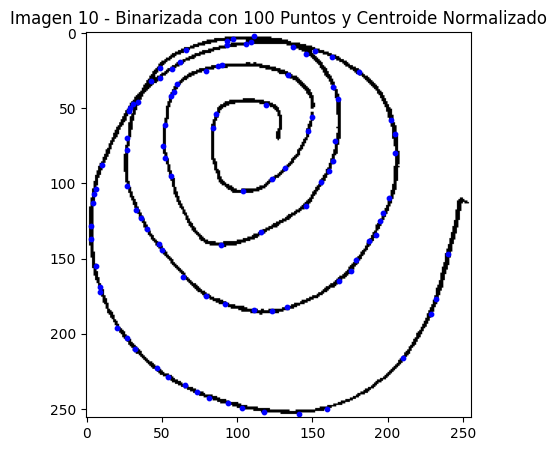

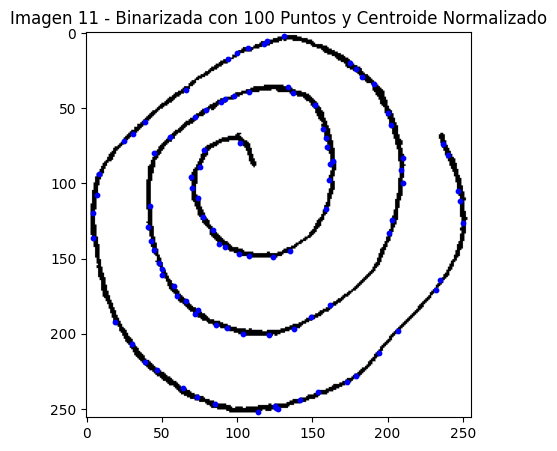

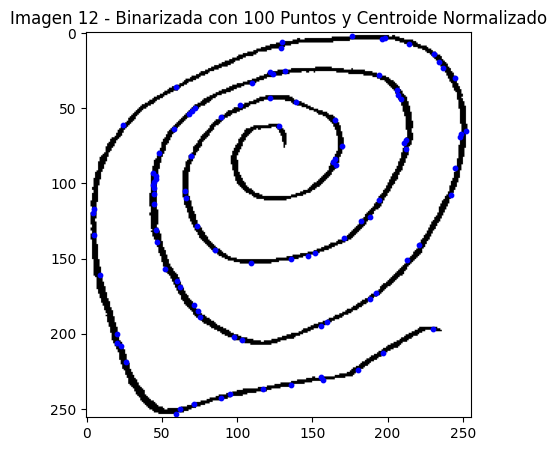

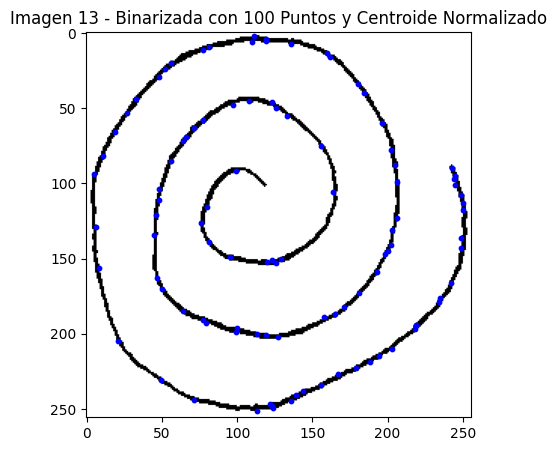

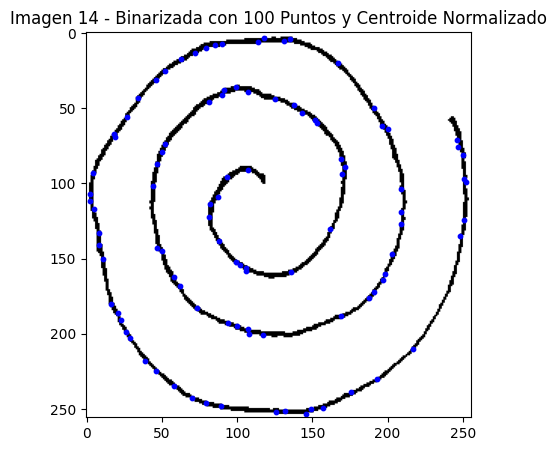

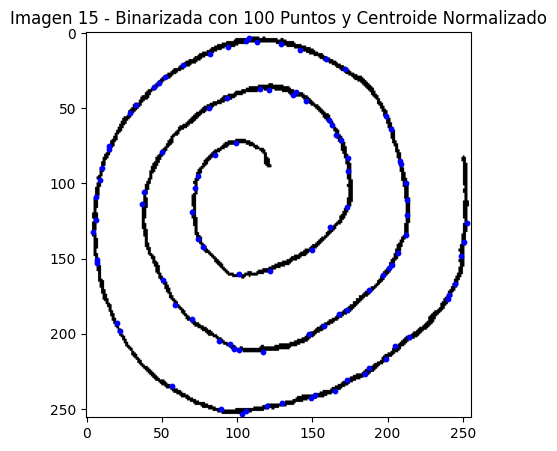

        x1     y1      x2     y2      x3     y3      x4     y4      x5     y5  \
0  -122.68 -24.82 -120.68 -28.82 -119.68 -33.82 -118.68   4.18 -116.68  19.18   
1  -118.94  50.65 -117.94  54.65 -116.94  42.65 -115.94  33.65 -114.94  35.65   
2  -131.76  23.04 -130.76  37.04 -129.76  42.04 -127.76   2.04 -125.76  -5.96   
3  -127.04 -17.30 -126.04  -7.30 -125.04 -12.30 -124.04 -26.30 -123.04 -28.30   
4  -124.96  21.29 -122.96  15.29 -121.96   9.29 -120.96   8.29 -119.96  34.29   
5  -124.44 -15.38 -122.44 -16.38 -121.44   1.62 -119.44 -33.38 -117.44  23.62   
6  -120.94   3.67 -119.94  31.67 -118.94  22.67 -117.94  -3.33 -117.94  39.67   
7  -118.12   5.05 -117.12  14.05 -116.12  31.05 -114.12  39.05 -111.12  -9.95   
8  -115.30  44.30 -113.30  29.30 -112.30  20.30 -111.30   9.30 -110.30   3.30   
9  -103.68  12.37 -101.68  -1.63 -100.68  -5.63  -99.68  10.37  -98.68   7.37   
10 -121.21  15.34 -118.21   4.34 -116.21   2.34 -113.21  -8.66 -110.21 -15.66   
11 -112.26  51.50 -111.26  7

In [10]:
#Prueba Sanos

# Ruta a la carpeta de imágenes en Google Drive
ruta_carpeta = os.path.join(base_path, spiral, testing,healthy)

# Lista para almacenar las imágenes
imagenes = []

# Cargar imágenes desde la carpeta
for nombre_archivo in os.listdir(ruta_carpeta):
    if nombre_archivo.endswith('.jpg') or nombre_archivo.endswith('.png'):
        ruta_imagen = os.path.join(ruta_carpeta, nombre_archivo)
        imagen0 = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
        imagen = cv2.medianBlur(imagen0, 3)

        # Redimensionar la imagen a 256x256
        imagen_redimensionada = cv2.resize(imagen, (256, 256))
        imagenes.append(imagen_redimensionada)

# Función para binarizar la imagen
def binarizar_imagen(imagen):
    thresh = threshold_otsu(imagen)
    binarizada = imagen > thresh
    return binarizada

# Función para obtener 100 puntos en X donde el píxel binarizado es 0 (inversa)
def obtener_100_puntos_x_inversa(imagen_binarizada):
    # Obtener las coordenadas X donde el píxel es 0
    x_coords, y_coords = np.where(imagen_binarizada == 0)

    # Si hay menos de 100 puntos, devolver todos los disponibles
    if len(x_coords) < 100:
        print("Advertencia: La imagen no tiene suficientes píxeles binarizados en 0.")
        return x_coords, y_coords

    # Seleccionar 100 puntos equidistantes
    indices = np.linspace(0, len(x_coords) - 1, 100, dtype=int)
    puntos_x = x_coords[indices]
    puntos_y = y_coords[indices]

    return puntos_x, puntos_y

# Lista para almacenar los DataFrames de cada imagen
dataframes = []

# Procesar cada imagen con normalización, polares y Hu moments
for i, imagen in enumerate(imagenes):
    imagen_binarizada = binarizar_imagen(imagen)
    puntos_x, puntos_y = obtener_100_puntos_x_inversa(imagen_binarizada)

    # === Normalización respecto al centroide ===
    x_mean = np.mean(puntos_x)
    y_mean = np.mean(puntos_y)
    x_norm = puntos_x - x_mean
    y_norm = puntos_y - y_mean

    # === Conversión a coordenadas polares ===
    #r = np.sqrt(x_norm**2 + y_norm**2)
    #theta = np.arctan2(y_norm, x_norm)

    # === Cálculo de momentos de Hu ===
    hu_moments = cv2.HuMoments(cv2.moments(imagen_binarizada.astype(np.uint8))).flatten()
    hu_log = -np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-10)  # Escala logarítmica para estabilidad

    # === Guardar características ===
    datos = {}
    for j in range(100):
        datos[f'x{j+1}'] = x_norm[j]#puntos_x[j]#x_norm[j]
        datos[f'y{j+1}'] = y_norm[j]#puntos_y[j]#y_norm[j]
        #datos[f'r{j+1}'] = r[j]
        #datos[f'theta{j+1}'] = theta[j]

    for j in range(7):
        datos[f'Hu{j+1}'] = hu_log[j]

    # Convertir el diccionario en un DataFrame
    df = pd.DataFrame([datos])
    dataframes.append(df)

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.imshow(imagen_binarizada, cmap='gray')
    plt.scatter(puntos_y, puntos_x, c='blue', s=10)
    plt.title(f'Imagen {i+1} - Binarizada con 100 Puntos y Centroide Normalizado')
    plt.show()


# Concatenar todos los DataFrames en uno solo
TeHe = pd.concat(dataframes, ignore_index=True)
TeHe['clase'] = 0

# Mostrar el DataFrame final
print(TeHe)

In [ ]:
#Set formation
df_train = pd.concat([TrPa, TrHe])
df_test = pd.concat([TePa, TeHe])
X_train = df_train.drop('clase', axis=1)
y_train = df_train['clase']
X_test = df_test.drop('clase', axis=1)
y_test = df_test['clase']
df_total = pd.concat([df_train, df_test])
print(df_total)

        x1     y1      x2     y2      x3     y3      x4     y4      x5     y5  \
0  -134.49 -23.68 -133.49  -6.68 -132.49   1.32 -130.49  16.32 -127.49  28.32   
1  -124.85 -22.97 -122.85  -5.97 -120.85  12.03 -117.85  25.03 -112.85  38.03   
2  -127.75 -27.50 -125.75  -9.50 -122.75 -36.50 -120.75  18.50 -117.75  34.50   
3  -138.41 -31.99 -134.41 -36.99 -131.41 -42.99 -130.41  -1.99 -129.41  12.01   
4  -108.97  -9.18 -106.97 -28.18 -104.97 -17.18 -102.97  39.82 -100.97  56.82   
..     ...    ...     ...    ...     ...    ...     ...    ...     ...    ...   
10 -121.21  15.34 -118.21   4.34 -116.21   2.34 -113.21  -8.66 -110.21 -15.66   
11 -112.26  51.50 -111.26  73.50 -110.26  71.50 -108.26   5.50 -107.26  89.50   
12 -125.56 -20.23 -123.56 -12.23 -122.56 -12.23 -121.56 -21.23 -120.56   4.77   
13 -118.99   6.65 -117.99  23.65 -116.99  19.65 -115.99   2.65 -114.99 -21.35   
14 -122.33 -16.24 -120.33 -18.24 -119.33 -11.24 -118.33   4.76 -116.33 -30.24   

    ...    x100   y100     

In [ ]:

# Path

train_dir = '/content/drive/MyDrive/.../archive/spiral/training'
test_dir = '/content/drive/MyDrive/.../archive/spiral/testing'

# Models
models = {
    'ResNet50': (ResNet50(weights='imagenet', include_top=False, pooling='avg'), resnet_preprocess),
    'VGG16': (VGG16(weights='imagenet', include_top=False, pooling='avg'), vgg_preprocess),
    'VGG19': (VGG19(weights='imagenet', include_top=False, pooling='avg'), vgg_preprocess),
}

# Features
def extract_features(model, preprocess, data_dir, target_size=(224, 224), batch_size=16):
    datagen = ImageDataGenerator(preprocessing_function=preprocess)
    generator = datagen.flow_from_directory(
        data_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False
    )
    features = model.predict(generator, verbose=1)
    labels = generator.classes
    return features, labels

#  Trainning and testing
for model_name, (cnn_model, preprocess_fn) in models.items():
    print(f"\n=== Modelo: {model_name} + SVM ===")

    # Extract features
    X_train, y_train = extract_features(cnn_model, preprocess_fn, train_dir)
    X_test, y_test = extract_features(cnn_model, preprocess_fn, test_dir)

    # Normalization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Traning SVC
    svm = SVC(kernel='linear', C=1.0)
    svm.fit(X_train_scaled, y_train)

    # Evaluation
    y_pred = svm.predict(X_test_scaled)

    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred, target_names=['Healthy', 'Parkinson']))
    print("--- Confusion Matrix ---")
    print(confusion_matrix(y_test, y_pred))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

=== Modelo: ResNet50 + SVM ===
Found 77 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step
Found 30 images belonging to 2 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step

--- Classification Report ---
              precision    recall  f1-score   support

     Healthy       0.76      0.87      0.81        15
   Parkinson       0.85      0.73      0.79        15

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

--- Confusion Matrix ---
[[13  2]
 [ 4 11]]

=== Modelo: VGG16 + SVM ===
Found 77 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 52s 10s/step
Found 30 images belonging to 2 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 9s/step

--- Classification Report ---
              precision    recall  f1-score   support

     Healthy       0.87      0.87      0.87        15
   Parkinson       0.87      0.87      0.87        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

--- Confusion Matrix ---
[[13  2]
 [ 2 13]]

=== Modelo: VGG19 + SVM ===
Found 77 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 60s 12s/step
Found 30 images belonging to 2 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 9s/step

--- Classification Report ---
              precision    recall  f1-score   support

     Healthy       0.69      0.73      0.71        15
   Parkinson       0.71      0.67      0.69        15

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30

--- Confusion Matrix ---
[[11  4]
 [ 5 10]]


X shape: (107, 207)  | y shape: (107,)
CV completada.


Model Accuracy Mean (%) Accuracy SD (%) Accuracy 95% CI  \
0          RandomForest             74.49           13.12  [70.96, 78.16]   
3            NaiveBayes             67.53           12.87  [64.02, 70.95]   
4            SVM-linear             61.04           13.25  [57.40, 64.69]   
2                  5-NN             60.84           14.61  [56.96, 64.84]   
1  MultilayerPerceptron             49.71           10.81  [46.71, 52.69]   

  Sensitivity Mean (%) Sensitivity SD (%) Sensitivity 95% CI  \
0                77.00              16.60     [72.47, 81.53]   
3                56.20              20.71     [50.53, 61.73]   
4                60.47              18.78     [55.33, 65.33]   
2                52.20              23.72     [45.87, 58.53]   
1                73.13              22.03     [66.93, 78.93]   

  Specificity Mean (%) Specificity SD (%) Specificity 95% CI F1 Mean (%)  \
0                71.73              21.99     [65.73, 77.73]       75.71   
3                79.60              19.73     [74.00, 84.93]       62.87   
4                61.33              17.05     [56.80, 66.20]       60.91   
2                69.33              23.70     [62.87, 75.53]       56.18   
1                23.87              22.41     [18.00, 30.13]       59.00   

  F1 SD (%)       F1 95% CI BalancedAcc Mean (%) BalancedAcc SD (%)  \
0     12.14  [72.44, 79.12]                74.37              13.33   
3     16.63  [58.25, 67.44]                67.90              12.82   
4     15.48  [56.48, 64.99]                60.90              12.96   
2     19.17  [51.03, 61.28]                60.77              14.47   
1     13.16  [55.19, 62.42]                48.50              10.94   

  BalancedAcc 95% CI  
0     [70.77, 78.07]  
3     [64.37, 71.33]  
4     [57.30, 64.47]  
2     [56.93, 64.73]  
1     [45.53, 51.53]

Model vs RF    Wilcoxon p  Holm-adjusted p
0  MultilayerPerceptron  3.544713e-09     1.417885e-08
1                  5-NN  2.116107e-08     6.348320e-08
3            SVM-linear  3.369501e-06     6.739002e-06
2            NaiveBayes  2.522216e-03     2.522216e-03

Test  Statistic             p
0  Friedman  82.742976  4.567355e-17

Model  Avg Rank (lower=better)
0          RandomForest                     1.70
3            NaiveBayes                     2.42
4            SVM-linear                     3.28
2                  5-NN                     3.32
1  MultilayerPerceptron                     4.28

Pair Rank diff  Significant(|Δ|>0.863)
7                    5-NN vs NaiveBayes     0.900                    True
8                    5-NN vs SVM-linear     0.040                   False
4          MultilayerPerceptron vs 5-NN     0.960                    True
5    MultilayerPerceptron vs NaiveBayes     1.860                    True
6    MultilayerPerceptron vs SVM-linear     1.000                    True
9              NaiveBayes vs SVM-linear     0.860                   False
1                  RandomForest vs 5-NN     1.620                    True
0  RandomForest vs MultilayerPerceptron     2.580                    True
2            RandomForest vs NaiveBayes     0.720                   False
3            RandomForest vs SVM-linear     1.580                    True

/tmp/ipython-input-2476245118.py:232: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_plot, labels=list(models.keys()))


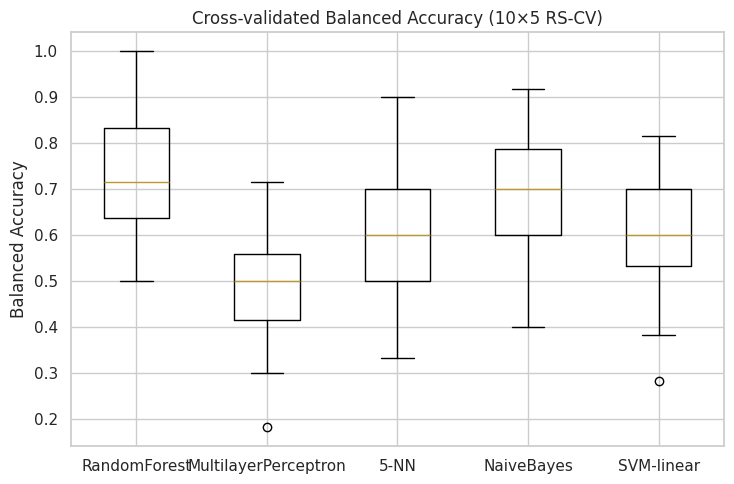


Archivos generados en: /content/drive/MyDrive/1. Tareas Maestria/Tesis
• cv_summary.[csv|xlsx]
• wilcoxon_vs_rf.[csv|xlsx]
• friedman.csv, avg_ranks_nemenyi.csv, nemenyi_pairs.csv
• boxplot_balanced_accuracy.png (600 DPI)


In [ ]:
# =====================================================
# CV 
# ====================================================

# =========================
# Configuration
# =========================
LABEL_COL = "clase"    # <-- class label
N_SPLITS = 10
N_REPEATS = 5
RANDOM_STATE = 42
PRIMARY_METRIC = "bacc"  # balnced accuracy

OUT = Path("/content/drive/MyDrive/1. Tareas Maestria/Tesis/")
OUT.mkdir(exist_ok=True)

# =========================
# Tools
# =========================
def specificity_score(y_true, y_pred, pos_label=1):
    """Especificidad: recall de la clase negativa."""
    neg = 0 if pos_label == 1 else 1
    return recall_score(y_true, y_pred, pos_label=neg)

def bootstrap_ci(values, n_boot=5000, ci=95, random_state=123):
    """IC 95% por bootstrap percentilado para una lista de valores."""
    rng = np.random.default_rng(random_state)
    arr = np.asarray(values)
    boots = []
    n = len(arr)
    for _ in range(n_boot):
        sample = rng.choice(arr, size=n, replace=True)
        boots.append(sample.mean())
    low = np.percentile(boots, (100-ci)/2)
    high = np.percentile(boots, 100 - (100-ci)/2)
    return float(low), float(high)

def holm_correction(pvals_dict, alpha=0.05):
    """Holm–Bonferroni step-down sobre un dict {modelo: p}."""
    items = sorted(pvals_dict.items(), key=lambda x: x[1])
    m = len(items)
    adjusted = {}
    for i, (name, p) in enumerate(items, start=1):
        adjusted[name] = min((m - i + 1) * p, 1.0)
    return {k: adjusted[k] for k in pvals_dict.keys()}

def nemenyi_cd(k, N, alpha=0.05):
    """Demsar (2006): CD aproximado según k y N. q_crit para alfa=0.05."""
    q_table = {4: 2.569, 5: 2.728, 6: 2.850, 7: 2.949, 8: 3.031}
    q = q_table.get(k, 2.569)
    cd = q * np.sqrt(k*(k+1)/(6.0*N))
    return cd, q

def ranks_from_scores(scores_dict):
    """Convierte {modelo: [scores por fold]} en rangos por fold y promedio."""
    models = list(scores_dict.keys())
    M = len(models)
    S = len(next(iter(scores_dict.values())))
    ranks = {m: [] for m in models}
    for i in range(S):
        row = [(m, scores_dict[m][i]) for m in models]
        row_sorted = sorted(row, key=lambda x: x[1], reverse=True)
        # ranking
        j = 0
        rank_vals = {}
        while j < M:
            tie_start = j
            s = row_sorted[j][1]
            while j+1 < M and np.isclose(row_sorted[j+1][1], s, atol=1e-12):
                j += 1
            tie_end = j
            avg_rank = (tie_start+1 + tie_end+1)/2.0
            for k in range(tie_start, tie_end+1):
                rank_vals[row_sorted[k][0]] = avg_rank
            j += 1
        for m in models:
            ranks[m].append(rank_vals[m])
    avg_ranks = {m: float(np.mean(ranks[m])) for m in models}
    return ranks, avg_ranks

def mcnemar_test(y_true, y_pred_a, y_pred_b):
    """McNemar con corrección de continuidad (opcional si usas holdout)."""
    y_true = np.asarray(y_true)
    a_corr = (y_pred_a == y_true)
    b_corr = (y_pred_b == y_true)
    b = int(np.sum((~a_corr) & (b_corr)))
    c = int(np.sum((a_corr) & (~b_corr)))
    chi2_stat = (abs(b - c) - 1)**2 / (b + c + 1e-12)
    p = 1 - chi2.cdf(chi2_stat, df=1)
    return chi2_stat, p, b, c

# =========================
# 1)Label
# =========================
assert LABEL_COL in df_total.columns, f"No encuentro '{LABEL_COL}' en columnas: {list(df_total.columns)}"
y = df_total[LABEL_COL].astype(int).values
X = df_total.drop(columns=[LABEL_COL]).values

print("X shape:", X.shape, " | y shape:", y.shape)

# =========================
# 2) Models
# =========================
models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=3,
        random_state=4, n_jobs=-1
    ),
    "MultilayerPerceptron": MLPClassifier(
        hidden_layer_sizes=(50,20), activation='relu', solver='adam', alpha=0.0002,
        learning_rate='adaptive', learning_rate_init=0.001, max_iter=500,
        early_stopping=True, validation_fraction=0.2, random_state=42
    ),
    "5-NN": Pipeline([("scaler", StandardScaler()),
                      ("knn", KNeighborsClassifier(n_neighbors=5, metric="manhattan"))]),
    "NaiveBayes": GaussianNB(),
    "SVM-linear": Pipeline([("scaler", StandardScaler()),
                            ("svc", SVC(kernel='linear', probability=False, random_state=42))]),
}

# =========================
# 3) CROSS-VALIDATION 10×5
# =========================
rskf = RepeatedStratifiedKFold(n_splits=N_SPLITS, n_repeats=N_REPEATS, random_state=RANDOM_STATE)

scores = {m: {"acc": [], "sens": [], "spec": [], "f1": [], "bacc": []} for m in models}
pred_store = {m: [] for m in models}   # opcional
true_store = []                        # por fold 

for fold, (tr, te) in enumerate(rskf.split(X, y), 1):
    Xtr, Xte = X[tr], X[te]
    ytr, yte = y[tr], y[te]
    true_store.append(yte)

    for name, clf in models.items():
        clf.fit(Xtr, ytr)
        yhat = clf.predict(Xte)
        pred_store[name].append(yhat)

        acc  = accuracy_score(yte, yhat)
        sens = recall_score(yte, yhat, pos_label=1)
        spec = specificity_score(yte, yhat, pos_label=1)
        f1   = f1_score(yte, yhat, pos_label=1)
        bacc = balanced_accuracy_score(yte, yhat)

        scores[name]["acc"].append(acc)
        scores[name]["sens"].append(sens)
        scores[name]["spec"].append(spec)
        scores[name]["f1"].append(f1)
        scores[name]["bacc"].append(bacc)

print("CV completada.")

# =========================
# 4) Summary
# =========================
rows = []
for name in models:
    row = {"Model": name}
    for key, label in [("acc","Accuracy"), ("sens","Sensitivity"),
                       ("spec","Specificity"), ("f1","F1"), ("bacc","BalancedAcc")]:
        arr = np.array(scores[name][key])
        mean = arr.mean()*100
        sd   = arr.std(ddof=1)*100
        lo, hi = [x*100 for x in bootstrap_ci(arr)]
        row[f"{label} Mean (%)"] = f"{mean:.2f}"
        row[f"{label} SD (%)"]   = f"{sd:.2f}"
        row[f"{label} 95% CI"]   = f"[{lo:.2f}, {hi:.2f}]"
    rows.append(row)

summary_df = pd.DataFrame(rows).sort_values(by="BalancedAcc Mean (%)", ascending=False)
summary_df.to_excel(OUT/"cv_summary.xlsx", index=False)
summary_df.to_csv(OUT/"cv_summary.csv", index=False)
display(summary_df)

# =========================
# 5) Statistical test
# =========================
# Wilcoxon and Holm
rf_arr = np.array(scores["RandomForest"][PRIMARY_METRIC])
pvals = {}
for name in models:
    if name == "RandomForest":
        continue
    stat, p = wilcoxon(rf_arr, np.array(scores[name][PRIMARY_METRIC]),
                       zero_method="zsplit", alternative="two-sided", correction=True)
    pvals[name] = p

adj = holm_correction(pvals)
wilcoxon_df = pd.DataFrame({
    "Model vs RF": list(pvals.keys()),
    "Wilcoxon p": [pvals[k] for k in pvals.keys()],
    "Holm-adjusted p": [adj[k] for k in pvals.keys()]
}).sort_values(by="Holm-adjusted p")
wilcoxon_df.to_excel(OUT/"wilcoxon_vs_rf.xlsx", index=False)
wilcoxon_df.to_csv(OUT/"wilcoxon_vs_rf.csv", index=False)
display(wilcoxon_df)

# Friedman (multi-model)
arrs = [np.array(scores[name][PRIMARY_METRIC]) for name in models]
friedman_stat, friedman_p = friedmanchisquare(*arrs)
friedman_res = pd.DataFrame({"Test": ["Friedman"], "Statistic": [friedman_stat], "p": [friedman_p]})
friedman_res.to_csv(OUT/"friedman.csv", index=False)
display(friedman_res)

# Nemenyi
_, avg_ranks = ranks_from_scores({name: scores[name][PRIMARY_METRIC] for name in models})
k = len(models); N = len(next(iter(scores.values()))[PRIMARY_METRIC])
cd, qcrit = nemenyi_cd(k, N, alpha=0.05)

ranks_df = pd.DataFrame({"Model": list(avg_ranks.keys()),
                         "Avg Rank (lower=better)": list(avg_ranks.values())}).sort_values(by="Avg Rank (lower=better)")
ranks_df.to_csv(OUT/"avg_ranks_nemenyi.csv", index=False)

pairs = []
mods = list(models.keys())
for a, b in itertools.combinations(mods, 2):
    diff = abs(avg_ranks[a] - avg_ranks[b])
    pairs.append({"Pair": f"{a} vs {b}", "Rank diff": f"{diff:.3f}", f"Significant(|Δ|>{cd:.3f})": diff > cd})
nemenyi_df = pd.DataFrame(pairs).sort_values(by="Pair")
nemenyi_df.to_csv(OUT/"nemenyi_pairs.csv", index=False)

display(ranks_df)
display(nemenyi_df)



TF devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Using GPU: []

=== TABULAR: Cross-Validation y tiempos ===


Model Accuracy Mean (%) Accuracy SD (%) Accuracy 95% CI  \
0          RandomForest             74.49           13.12  [70.96, 78.16]   
3            NaiveBayes             67.53           12.87  [64.02, 70.95]   
4            SVM-linear             61.04           13.25  [57.40, 64.69]   
2                  5-NN             60.84           14.61  [56.96, 64.84]   
1  MultilayerPerceptron             49.71           10.81  [46.71, 52.69]   

  Sensitivity Mean (%) Sensitivity SD (%) Sensitivity 95% CI  \
0                77.00              16.60     [72.47, 81.53]   
3                56.20              20.71     [50.53, 61.73]   
4                60.47              18.78     [55.33, 65.33]   
2                52.20              23.72     [45.87, 58.53]   
1                73.13              22.03     [66.93, 78.93]   

  Specificity Mean (%) Specificity SD (%) Specificity 95% CI F1 Mean (%)  \
0                71.73              21.99     [65.73, 77.73]       75.71   
3                79.60              19.73     [74.00, 84.93]       62.87   
4                61.33              17.05     [56.80, 66.20]       60.91   
2                69.33              23.70     [62.87, 75.53]       56.18   
1                23.87              22.41     [18.00, 30.13]       59.00   

  F1 SD (%)       F1 95% CI BalancedAcc Mean (%) BalancedAcc SD (%)  \
0     12.14  [72.44, 79.12]                74.37              13.33   
3     16.63  [58.25, 67.44]                67.90              12.82   
4     15.48  [56.48, 64.99]                60.90              12.96   
2     19.17  [51.03, 61.28]                60.77              14.47   
1     13.16  [55.19, 62.42]                48.50              10.94   

  BalancedAcc 95% CI  
0     [70.77, 78.07]  
3     [64.37, 71.33]  
4     [57.30, 64.47]  
2     [56.93, 64.73]  
1     [45.53, 51.53]

Model  CV folds CV total seconds CV avg seconds per fold
3            NaiveBayes        50             0.43                   0.009
2                  5-NN        50             0.50                   0.010
4            SVM-linear        50             0.58                   0.012
0          RandomForest        50            14.22                   0.284
1  MultilayerPerceptron        50             2.05                   0.041

/tmp/ipython-input-2776511165.py:98: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(metric_lists, labels=labels)


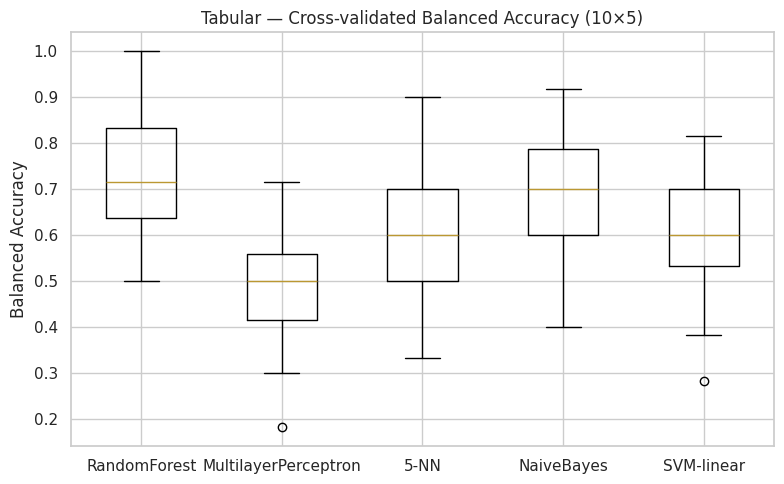


=== TRANSFER LEARNING: Extracción, CV y tiempos ===

-- ResNet50 + SVM (linear) --
Found 77 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step
Found 30 images belonging to 2 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step

-- VGG16 + SVM (linear) --
Found 77 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step
Found 30 images belonging to 2 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 8s/step

-- VGG19 + SVM (linear) --
Found 77 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 52s 10s/step
Found 30 images belonging to 2 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 10s/step


Model Accuracy Mean (%) Accuracy SD (%) Accuracy 95% CI  \
0  ResNet50+SVM             84.62           11.23  [81.53, 87.62]   
1     VGG16+SVM             81.87           13.00  [78.07, 85.44]   
2     VGG19+SVM             75.56           12.44  [72.13, 78.87]   

  Sensitivity Mean (%) Sensitivity SD (%) Sensitivity 95% CI  \
0                78.53              18.54     [73.33, 83.53]   
1                80.80              18.87     [75.27, 86.13]   
2                72.40              22.08     [66.33, 78.13]   

  Specificity Mean (%) Specificity SD (%) Specificity 95% CI F1 Mean (%)  \
0                91.20              10.81     [88.00, 94.00]       83.30   
1                83.13              15.63     [78.73, 87.33]       81.52   
2                79.07              13.70     [75.27, 82.80]       74.01   

  F1 SD (%)       F1 95% CI BalancedAcc Mean (%) BalancedAcc SD (%)  \
0     13.58  [79.50, 86.91]                84.87              10.87   
1     14.12  [77.34, 85.42]                81.97              12.88   
2     16.03  [69.42, 78.19]                75.73              12.40   

  BalancedAcc 95% CI  
0     [81.87, 87.80]  
1     [78.27, 85.53]  
2     [72.33, 79.07]

Model Feature extraction seconds  CV folds CV total seconds  \
2     VGG19+SVM                     102.22        50             0.62   
0  ResNet50+SVM                      26.24        50             1.41   
1     VGG16+SVM                      58.82        50             0.98   

  CV avg seconds per fold TOTAL seconds (extract+CV)  
2                   0.012                     102.84  
0                   0.028                      27.65  
1                   0.020                      59.80

/tmp/ipython-input-2776511165.py:98: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(metric_lists, labels=labels)


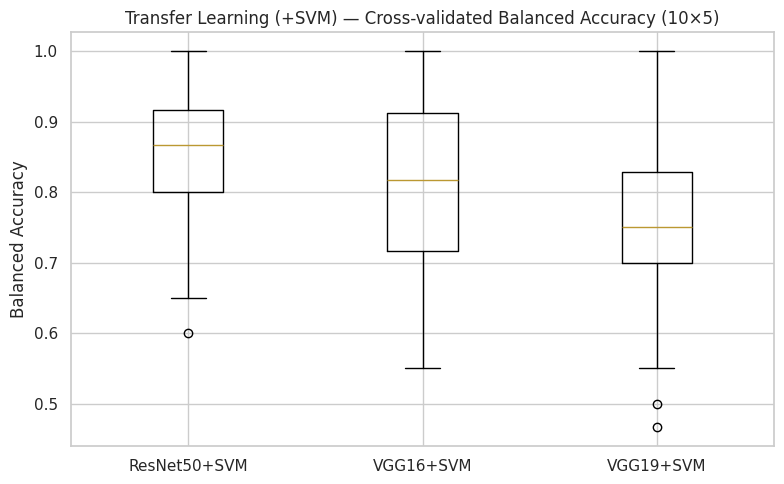

Model  CV folds  CV total seconds  CV avg seconds per fold  \
0            NaiveBayes        50              0.43                    0.009   
1                  5-NN        50              0.50                    0.010   
2            SVM-linear        50              0.58                    0.012   
4  MultilayerPerceptron        50              2.05                    0.041   
3          RandomForest        50             14.22                    0.284   
6          ResNet50+SVM        50              1.41                    0.028   
7             VGG16+SVM        50              0.98                    0.020   
5             VGG19+SVM        50              0.62                    0.012   

   Feature extraction seconds  TOTAL seconds (extract+CV)  
0                        0.00                        0.43  
1                        0.00                        0.50  
2                        0.00                        0.58  
4                        0.00                        2.05  
3                        0.00                       14.22  
6                       26.24                       27.65  
7                       58.82                       59.80  
5                      102.22                      102.84

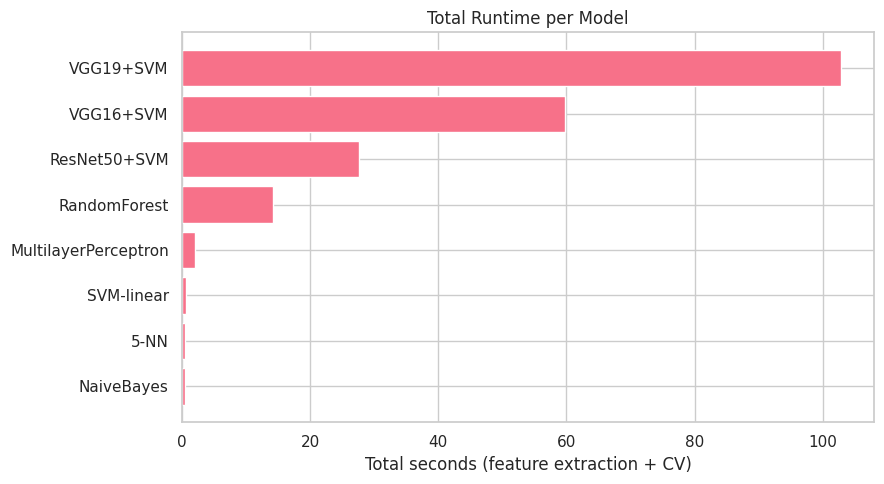


Listo. Revisa carpetas:
 - /content/drive/MyDrive/1. Tareas Maestria/Tesis/results_tabular
 - /content/drive/MyDrive/1. Tareas Maestria/Tesis/results_transfer
 Archivos globales: results_all_times.[csv|xlsx], bar_total_seconds_all_models.png (600 DPI)


In [ ]:
# =====================================================
# Evaluation and  comparisson
# =====================================================

sns.set(style="whitegrid", palette="husl")

# =========================
# Global Configuration
# =========================
LABEL_COL = "clase"    
N_SPLITS = 10
N_REPEATS = 5
RANDOM_STATE = 42
PRIMARY_METRIC = "bacc"  


train_dir = '/content/drive/MyDrive/1. Tareas Maestria/Tesis/archive/spiral/training'
test_dir  = '/content/drive/MyDrive/1. Tareas Maestria/Tesis/archive/spiral/testing'
TARGET_SIZE = (224, 224)
BATCH_SIZE  = 16

OUT_TAB = Path("/content/drive/MyDrive/1. Tareas Maestria/Tesis/results_tabular")
OUT_TL  = Path("/content/drive/MyDrive/1. Tareas Maestria/Tesis/results_transfer")
OUT_TAB.mkdir(exist_ok=True)
OUT_TL.mkdir(exist_ok=True)

print("TF devices:", tf.config.list_physical_devices())
print("Using GPU:", tf.config.list_physical_devices('GPU'))

# =========================
# Tools
# =========================
def specificity_score(y_true, y_pred, pos_label=1):
    neg = 0 if pos_label == 1 else 1
    return recall_score(y_true, y_pred, pos_label=neg)

def bootstrap_ci(values, n_boot=5000, ci=95, random_state=123):
    rng = np.random.default_rng(random_state)
    arr = np.asarray(values)
    n = len(arr)
    boots = []
    for _ in range(n_boot):
        sample = rng.choice(arr, size=n, replace=True)
        boots.append(sample.mean())
    low = np.percentile(boots, (100-ci)/2)
    high = np.percentile(boots, 100 - (100-ci)/2)
    return float(low), float(high)

def summarize_scores(name, scores_dict):
    row = {"Model": name}
    for key, label in [("acc","Accuracy"), ("sens","Sensitivity"),
                       ("spec","Specificity"), ("f1","F1"), ("bacc","BalancedAcc")]:
        arr = np.array(scores_dict[key])
        mean = arr.mean()*100
        sd   = arr.std(ddof=1)*100
        lo, hi = [x*100 for x in bootstrap_ci(arr)]
        row[f"{label} Mean (%)"] = f"{mean:.2f}"
        row[f"{label} SD (%)"]   = f"{sd:.2f}"
        row[f"{label} 95% CI"]   = f"[{lo:.2f}, {hi:.2f}]"
    return row

def boxplot_metric(metric_lists, labels, title, out_path):
    plt.figure(figsize=(8,5))
    plt.boxplot(metric_lists, labels=labels)
    plt.ylabel("Balanced Accuracy")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(out_path, dpi=600)
    plt.show()

# =====================================================
# PARTE A) TABULAR (
# =====================================================
assert 'df_total' in globals(), "df_total no está definido en el entorno."
assert LABEL_COL in df_total.columns, f"No encuentro '{LABEL_COL}' en df_total."

y_tab = df_total[LABEL_COL].astype(int).values
X_tab = df_total.drop(columns=[LABEL_COL]).values

models_tab = {
    "RandomForest": RandomForestClassifier(
        n_estimators=100, max_depth=10,
        min_samples_split=10, min_samples_leaf=3,
        random_state=4, n_jobs=-1
    ),
    "MultilayerPerceptron": MLPClassifier(
        hidden_layer_sizes=(50,20), activation='relu', solver='adam', alpha=0.0002,
        learning_rate='adaptive', learning_rate_init=0.001, max_iter=500,
        early_stopping=True, validation_fraction=0.2, random_state=42
    ),
    "5-NN": Pipeline([("scaler", StandardScaler()),
                      ("knn", KNeighborsClassifier(n_neighbors=5, metric="manhattan"))]),
    "NaiveBayes": GaussianNB(),
    "SVM-linear": Pipeline([("scaler", StandardScaler()),
                            ("svc", SVC(kernel='linear', probability=False, random_state=42))]),
}

rskf_tab = RepeatedStratifiedKFold(n_splits=N_SPLITS, n_repeats=N_REPEATS, random_state=RANDOM_STATE)

tab_summary_rows = []
tab_times_rows   = []
tab_metric_box   = {}  # para boxplot bacc

print("\n=== TABULAR: Cross-Validation y tiempos ===")
for name, model in models_tab.items():
    scores = {"acc":[], "sens":[], "spec":[], "f1":[], "bacc":[]}
    t0 = time.perf_counter()
    for fold, (tr, te) in enumerate(rskf_tab.split(X_tab, y_tab), 1):
        Xtr, Xte = X_tab[tr], X_tab[te]
        ytr, yte = y_tab[tr], y_tab[te]
        model.fit(Xtr, ytr)
        yhat = model.predict(Xte)

        scores["acc"].append(accuracy_score(yte, yhat))
        scores["sens"].append(recall_score(yte, yhat, pos_label=1))
        scores["spec"].append(specificity_score(yte, yhat, pos_label=1))
        scores["f1"].append(f1_score(yte, yhat, pos_label=1))
        scores["bacc"].append(balanced_accuracy_score(yte, yhat))
    elapsed = time.perf_counter() - t0

    tab_summary_rows.append(summarize_scores(name, scores))
    tab_times_rows.append({
        "Model": name,
        "CV folds": N_SPLITS * N_REPEATS,
        "CV total seconds": f"{elapsed:.2f}",
        "CV avg seconds per fold": f"{elapsed/(N_SPLITS*N_REPEATS):.3f}"
    })
    tab_metric_box[name] = scores["bacc"]

tab_sum_df  = pd.DataFrame(tab_summary_rows).sort_values(by="BalancedAcc Mean (%)", ascending=False)
tab_time_df = pd.DataFrame(tab_times_rows).sort_values(by="CV total seconds", ascending=True)

tab_sum_df.to_excel(OUT_TAB/"cv_summary_tabular.xlsx", index=False)
tab_sum_df.to_csv(OUT_TAB/"cv_summary_tabular.csv", index=False)
tab_time_df.to_excel(OUT_TAB/"cv_times_tabular.xlsx", index=False)
tab_time_df.to_csv(OUT_TAB/"cv_times_tabular.csv", index=False)

display(tab_sum_df)
display(tab_time_df)
boxplot_metric([tab_metric_box[k] for k in tab_metric_box.keys()],
               list(tab_metric_box.keys()),
               "Tabular — Cross-validated Balanced Accuracy (10×5)",
               OUT_TAB/"boxplot_bacc_tabular.png")

# =====================================================
# PART B) TRANSFER LEARNING (ResNet50/VGG16/VGG19) + SVM: CV 
# =====================================================
cnn_models = {
    'ResNet50': (ResNet50(weights='imagenet', include_top=False, pooling='avg'), resnet_preprocess),
    'VGG16'   : (VGG16(  weights='imagenet', include_top=False, pooling='avg'), vgg_preprocess),
    'VGG19'   : (VGG19(  weights='imagenet', include_top=False, pooling='avg'), vgg_preprocess),
}

def extract_features_dir(model, preprocess, data_dir, target_size=(224,224), batch_size=16):
    datagen = ImageDataGenerator(preprocessing_function=preprocess)
    gen = datagen.flow_from_directory(
        data_dir, target_size=target_size, batch_size=batch_size,
        class_mode='binary', shuffle=False
    )
    feats = model.predict(gen, verbose=1)
    labels = gen.classes
    files = gen.filenames
    class_indices = gen.class_indices
    return feats, labels, files, class_indices

tl_summary_rows = []
tl_times_rows   = []
tl_metric_box   = {}

print("\n=== TRANSFER LEARNING: Extracción, CV y tiempos ===")
for model_name, (cnn, preprocess_fn) in cnn_models.items():
    print(f"\n-- {model_name} + SVM (linear) --")

    # (1) features 
    t_ext0 = time.perf_counter()
    X_tr, y_tr, f_tr, idx_tr = extract_features_dir(cnn, preprocess_fn, train_dir, TARGET_SIZE, BATCH_SIZE)
    X_te, y_te, f_te, idx_te = extract_features_dir(cnn, preprocess_fn, test_dir,  TARGET_SIZE, BATCH_SIZE)
    ext_seconds = time.perf_counter() - t_ext0

    # (2) Dataset
    X_all = np.vstack([X_tr, X_te])
    y_all = np.concatenate([y_tr, y_te])

    # (3) Clasificador: SVM lineal
    clf = Pipeline([
        ("scaler", StandardScaler(with_mean=True)),
        ("svm", SVC(kernel="linear", C=1.0, probability=False, random_state=RANDOM_STATE))
    ])

    # (4) CV 
    rskf_tl = RepeatedStratifiedKFold(n_splits=N_SPLITS, n_repeats=N_REPEATS, random_state=RANDOM_STATE)
    scores = {"acc":[], "sens":[], "spec":[], "f1":[], "bacc":[]}

    t_cv0 = time.perf_counter()
    for fold, (tr, te) in enumerate(rskf_tl.split(X_all, y_all), 1):
        Xtr, Xte = X_all[tr], X_all[te]
        ytr, yte = y_all[tr], y_all[te]
        clf.fit(Xtr, ytr)
        yhat = clf.predict(Xte)

        scores["acc"].append(accuracy_score(yte, yhat))
        scores["sens"].append(recall_score(yte, yhat, pos_label=1))
        scores["spec"].append(specificity_score(yte, yhat, pos_label=1))
        scores["f1"].append(f1_score(yte, yhat, pos_label=1))
        scores["bacc"].append(balanced_accuracy_score(yte, yhat))
    cv_seconds = time.perf_counter() - t_cv0

    # (5)  cronos
    tl_summary_rows.append(summarize_scores(f"{model_name}+SVM", scores))
    tl_times_rows.append({
        "Model": f"{model_name}+SVM",
        "Feature extraction seconds": f"{ext_seconds:.2f}",
        "CV folds": N_SPLITS*N_REPEATS,
        "CV total seconds": f"{cv_seconds:.2f}",
        "CV avg seconds per fold": f"{cv_seconds/(N_SPLITS*N_REPEATS):.3f}",
        "TOTAL seconds (extract+CV)": f"{(ext_seconds+cv_seconds):.2f}"
    })
    tl_metric_box[f"{model_name}+SVM"] = scores["bacc"]

# Save and show
tl_sum_df  = pd.DataFrame(tl_summary_rows).sort_values(by="BalancedAcc Mean (%)", ascending=False)
tl_time_df = pd.DataFrame(tl_times_rows).sort_values(by="TOTAL seconds (extract+CV)", ascending=True)

tl_sum_df.to_excel(OUT_TL/"cv_summary_tl.xlsx", index=False)
tl_sum_df.to_csv(OUT_TL/"cv_summary_tl.csv", index=False)
tl_time_df.to_excel(OUT_TL/"cv_times_tl.xlsx", index=False)
tl_time_df.to_csv(OUT_TL/"cv_times_tl.csv", index=False)

display(tl_sum_df)
display(tl_time_df)
boxplot_metric([tl_metric_box[k] for k in tl_metric_box.keys()],
               list(tl_metric_box.keys()),
               "Transfer Learning (+SVM) — Cross-validated Balanced Accuracy (10×5)",
               OUT_TL/"boxplot_bacc_tl.png")

# =====================================================
# PART C) Global time
# =====================================================
time_tab = tab_time_df.copy()
time_tl  = tl_time_df[["Model","CV folds","CV total seconds","CV avg seconds per fold","Feature extraction seconds","TOTAL seconds (extract+CV)"]].copy()


time_tab["Feature extraction seconds"] = "0.00"
time_tab["TOTAL seconds (extract+CV)"] = time_tab["CV total seconds"]

# export
time_all = pd.concat([time_tab, time_tl], ignore_index=True)
# Numeric convertion:
def to_float(s):
    try: return float(s)
    except: return np.nan
for col in ["CV total seconds","CV avg seconds per fold","Feature extraction seconds","TOTAL seconds (extract+CV)"]:
    time_all[col] = time_all[col].apply(to_float)

time_all = time_all.sort_values(by="TOTAL seconds (extract+CV)", ascending=True)
display(time_all)

time_all.to_excel("results_all_times.xlsx", index=False)
time_all.to_csv("results_all_times.csv", index=False)

# Bar total timing
plt.figure(figsize=(9,5))
plt.barh(time_all["Model"], time_all["TOTAL seconds (extract+CV)"])
plt.xlabel("Total seconds (feature extraction + CV)")
plt.title("Total Runtime per Model")
plt.tight_layout()
plt.savefig("bar_total_seconds_all_models.png", dpi=600)
plt.show()

print("\nListo. Revisa carpetas:")
print(" -", OUT_TAB.resolve())
print(" -", OUT_TL.resolve())
print(" Archivos globales: results_all_times.[csv|xlsx], bar_total_seconds_all_models.png (600 DPI)")
